Links to Yelp dataset files : https://drive.google.com/drive/folders/15_pQBF8zIOnxXSaDx19DN8eU-lXrvIeW?usp=share_link https://drive.google.com/drive/folders/1-9SOeLW8g97fiX2On7_7Wm1ePt2pSnDU?usp=share_link

# Preprocessing...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import torch
import json
import matplotlib.pyplot as plt
import os
import tqdm
import pickle
from pathlib import Path
from torch.utils.data import DataLoader
from sklearn.metrics import ndcg_score
np.random.seed(0)

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import FreqDist
import re
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

In [ ]:
save_path='/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/Recommender/Yelp/'

In [ ]:
save_path2='/content/drive/MyDrive/Yelp/'

In [ ]:
import torch
import gc

torch.cuda.empty_cache()
# del checkin_df
# del data
# del data_file


In [ ]:
gc.collect()

0

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/Recommender/Yelp/Kaggle/"

In [ ]:
%cd /content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/Recommender/Yelp/Kaggle/

/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/Recommender/Yelp/Kaggle


In [ ]:
!kaggle datasets download -d yelp-dataset/yelp-dataset --unzip

100% 4.06G/4.07G [02:00<00:00, 27.4MB/s]
100% 4.07G/4.07G [02:00<00:00, 36.3MB/s]


In [ ]:
import json
import pandas as pd
data_file = open(save_path+"Kaggle/yelp_academic_dataset_business.json")
data = []
for line in data_file:
  data.append(json.loads(line))
business_df = pd.DataFrame(data)
data_file.close()

In [ ]:
business_df.attributes= business_df.attributes.apply(lambda y: np.nan if y==None else y)

In [ ]:
business_df.dropna(axis=0,inplace=True)

In [ ]:
business_df1=business_df[business_df['is_open']==1]

In [ ]:
business_df=business_df1[business_df1['review_count']>10]

In [ ]:
import json
import pandas as pd
data_file = open(save_path+"Kaggle/yelp_academic_dataset_tip.json")
data = []
for line in data_file:
  data.append(json.loads(line))
tip_df = pd.DataFrame(data)
data_file.close()

In [ ]:
tips_bus_ids=tip_df['business_id'].values
tips_user_ids= tip_df['user_id'].values

In [ ]:
business_df.drop(business_df.index[~business_df['business_id'].isin(tips_bus_ids)], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
saved_bus_ids=os.listdir(save_path+'tips_bert_items_dfs/')

In [ ]:
len(saved_bus_ids)

48732

In [ ]:
new_saved_bus_ids=[]
for bus_id in saved_bus_ids:
  new_saved_bus_ids.append(bus_id[:-5])

In [ ]:
business_df.drop(business_df.index[~business_df['business_id'].isin(new_saved_bus_ids)], inplace=True)

In [ ]:
tip_df.drop(tip_df.index[~tip_df['business_id'].isin(new_saved_bus_ids)], inplace=True)
tip_df.drop(tip_df.index[~tip_df['business_id'].isin(business_df['business_id'].values)], inplace=True)

In [ ]:
tip_df['bus_user_id']=tip_df[['business_id','user_id']].apply(tuple, axis=1)

In [ ]:
tip_df

In [ ]:
business_df.reset_index(inplace=True)

In [ ]:
business_df.drop(['index'],axis=1,inplace=True)

In [ ]:
bus_ids=business_df.business_id.values

In [ ]:
len(bus_ids)

48089

In [ ]:
# with open('badFiles.txt', 'r') as bf:
#   lines=bf.readlines()
#   for line in lines:
#     if len(line)>4:
#       try:
#         os.remove(save_path+'tips_bert_items_dfs/'+'{}.json'.format(line.replace('\n','')))
#       except FileNotFoundError:
#         print(line)

In [ ]:
# new_bus_ids=[]
# i=0
# for id in bus_ids:
#   if i%1000==0:
#     print(i)
#   i+=1
#   if i<43000:
#     continue
#   with open(save_path+'tips_bert_items_dfs/'+'{}.json'.format(id)) as fd:
#     lines= fd.readlines()
#     if len(lines[0])<5:
#       print(id)
#       # print(lines)
#     else:
#       new_bus_ids.append(id)
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
s5cEDXoKrvD-coPgqifD8w
FbuQkR42LQ-8AZINSD7FQQ
RtdH6Inl8xG6RWl5PVwccg
zIFPcIZ_yqIr2Gb3dYZvfQ
U5vGEpfMzlHmdVMsaAxWAA
nCQnjq8uoY7YWGMwOxP2wA
sa0qlVEgdctgeWo8KkWEjw
zVoivXO64KO9-4UQlMhoPA
fiKriXSPJQLoDnMIucTXQQ
1Hd6GDCbsev3NUaynU8hFQ
B6wuW9wBR2qc3Q3fs4Ckkw
HznFRGROzuvVBeM5hrwZig
xS9q3oPQHaM4etfeSvFpew
OM2bY0wa1-mwECTO_zrZkw
7ogUy7wU7hwEm43pAtA8tQ
8SEX-Mx-ZC64g6laAEj2bg
cZwhdOCpa84XrpLQREOtaA
hNWf3Uz8M17e2qB3eBV8jg
wtMhl1OIcPBPc2qj-6_-OQ
oJbhXG2IldIhNFydRWjD7A
DsIeBV5j-1Y6X5BNnyjRzw
xEOMVwCzxjcmwIoxQ3sCBg
sbUASO4t6DMb2DygKN-scg
AZmxWOK3ov1-_9hPBzSIng
NDwoKO79_T49UEKVDlHd3A
W0ziF4eQxT_1KkgYDHWlcw
IjcDm_NIT0P4vxevx1obAg
krcU3vu-4xC_O5Zb0IXqJg
gGtvjhVT-Jojd1iGefopIg
wn-l6xkj9WZu_VnotRAMvA
KSR9Rv0Uea55YF-PNWXj1A
VP6khoAuw4HWtHUUhw7gkQ
hE2K63wovs5Po

In [ ]:
business_df

In [ ]:
# import json
# import pandas as pd
# data_file = open(save_path+"Kaggle/yelp_academic_dataset_review.json")
# data = []
# for line in data_file:
#   data.append(json.loads(line))
# review_df = pd.DataFrame(data)
# data_file.close()

In [ ]:
# review_df

In [ ]:
# review_df.drop(['useful','funny','cool','date'],axis=1,inplace=True)

In [ ]:
# review_df.drop(review_df.index[~review_df['business_id'].isin(bus_ids)], inplace=True)

In [ ]:
# review_df.drop(review_df.index[~review_df['business_id'].isin(tips_bus_ids)], inplace=True)

In [ ]:
# review_df.drop(review_df.index[~review_df['user_id'].isin(tips_user_ids)], inplace=True)

In [ ]:
# review_df

In [ ]:
# review_df.to_csv(save_path+'yelp_reviews.csv')

In [ ]:
review_df=pd.read_csv(save_path+'yelp_reviews.csv')

In [ ]:
# import json
# import pandas as pd
# data_file = open(save_path+"Kaggle/yelp_academic_dataset_user.json")
# data = []
# for line in data_file:
#   data.append(json.loads(line))
# user_df = pd.DataFrame(data)
# data_file.close()

In [ ]:
# user_df=user_df[user_df['review_count']>20]

In [ ]:
# user_df

In [ ]:
# user_ids=user_df['user_id'].values

In [ ]:
# user_ids

array(['qVc8ODYU5SZjKXVBgXdI7w', 'j14WgRoU_-2ZE1aw1dXrJg',
       '2WnXYQFK0hXEoTxPtV2zvg', ..., '_K4X0IBlwDSnClxOrOdxVw',
       'E7Stb54xluW_QabdPRwvog', 'fB3jbHi3m0L2KgGOxBv6uw'], dtype=object)

In [ ]:
# review_df.drop(review_df.index[~review_df['user_id'].isin(user_ids)], inplace=True)

In [ ]:
# review_df

In [ ]:
from sklearn import preprocessing
import numpy as np

In [ ]:
business_df.drop(['name','address','city','state','postal_code'],axis=1,inplace=True)


In [ ]:
business_df.drop(['is_open','review_count'],axis=1,inplace=True)

In [ ]:
business_df.reset_index(inplace=True)

In [ ]:
scaled_features.to_csv(save_path+'normalized_business_dataset.csv')

In [ ]:
scaled_features=pd.read_csv(save_path+'normalized_business_dataset.csv')

In [ ]:
import pandas as pd
import numpy as np
import torch
import json
import matplotlib.pyplot as plt
import os
import tqdm
import pickle
from pathlib import Path
from torch.utils.data import DataLoader
from sklearn.metrics import ndcg_score
import torch.nn.functional as F
np.random.seed(0)

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import FreqDist
import re
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
import pandas as pd

In [ ]:
# sentires_dir='/content/drive/MyDrive/Recommender/cell_phone/Cell_Phones_and_Accessories'
test_length=5
sample_ratio=5
val_length=5
neg_length=100
dataset='yelp'
save_path='/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/Recommender/Yelp/'

In [ ]:
all_pairs=tip_df['bus_user_id'].values

In [ ]:
all_pairs

array([('QoezRbYQncpRqyrLH6Iqjg', 'NBN4MgHP9D3cw--SnauTkA'),
       ('hV-bABTK-glh5wj31ps_Jw', 'FjMQVZjSqY8syIO-53KFKw'),
       ('_uN0OudeJ3Zl_tf6nxg5ww', 'ld0AperBXk1h6UbqmM80zw'), ...,
       ('hYnMeAO77RGyTtIzUSKYzQ', 'v48Spe6WEpqehsF2xQADpg'),
       ('s2eyoTuJrcP7I_XyjdhUHQ', 'ckqKGM2hl7I9Chp5IpAhkw'),
       ('_cb1Vg1NIWry8UA0jyuXnQ', '4tF1CWdMxvvwpUIgGsDygA')], dtype=object)

In [ ]:
def get_user_item_dict(all_pairs):
  user_dict = {}
  item_dict = {}
  # user_item_pairs=[]
  j=0
  print(len(all_pairs))
  for user_item in all_pairs:
    item= user_item[0]
    user= user_item[1]
    # if j%1000==0:
    #   print(j)
    # j+=1
    # user=row['user_id']
    # item=row['business_id']
    # if item in items_list:
    # if (user,item) not in user_item_pairs:
    # user_item_pairs.append((user,item))
    if user not in user_dict:
        user_dict[user] = [item]
    else:
        user_dict[user].append(item)
    if item not in item_dict:
        item_dict[item] = [user]
    else:
        item_dict[item].append(user)
    # user_item_pairs=list(set(user_item_pairs))
  return user_dict,item_dict

In [ ]:
import os

In [ ]:
def get_initialized_teta2(features,len_words,words_indices,val):
  init_teta=torch.zeros(len(features), len_words)
  indices = torch.arange(init_teta.size(0)).long()
  init_teta[indices, torch.LongTensor(words_indices)] =val
  init_teta = init_teta.to(device)
  init_teta.requires_grad = True
  return init_teta

In [ ]:
def get_initialized_teta(values,matrix,num):
  # print(matrix.shape)
  init_teta=torch.zeros(matrix.shape[1],matrix.shape[0])
  indices = torch.arange(init_teta.size(0)).long()
  values1=np.array(values)
  values_indices=[np.where((matrix.cpu().numpy()[:,i]==values[i]))[0][0] for i in range(len(values))]
  init_teta[indices, torch.LongTensor(values_indices)] =num
  init_teta = init_teta.to(device)
  init_teta.requires_grad = True
  return init_teta

In [ ]:
print(len(all_pairs))

626069


In [ ]:
def sample_gumbel(shape, eps=1e-20):
  U = torch.rand(shape)
  U = U.cuda()
  return -torch.log(-torch.log(U + eps) + eps)

In [ ]:
def get_average_vect_train(item_id,not_in_columns):
  all_words=[]
  all_vects=[]
  # print(item_id)
  try:
    df=pd.read_json(save_path+'tips_bert_items_dfs/'+'{}.json'.format(item_id))
    df1=df.copy()
    df1['main_word']=np.where(df1['replaced_word'] == df1[not_in_columns],1,0)
    df1=df1[df1['main_word']==1]
    if df1.empty:
      df1=df.copy()
      df1['main_word']=np.where(df1['logit']==5.0,1,0)
      df1=df1[df1['main_word']==1]
    if df1.empty:
      df1=df.copy()
      df1['main_word']=np.where(df1['logit']==12.0,1,0)
      df1=df1[df1['main_word']==1]
    lists=df1.loc[:, ~df1.columns.isin([not_in_columns,'replaced_word','logit','main_word'])].values
    words=df1[not_in_columns].values
    all_words+=list(words)
    # print(words)
    vects=[sub_list[0] for sub_list in lists]
    all_vects+=vects
    average=np.average(np.array(all_vects),axis=0)
  except TypeError:
    return None,None
  # print(vects)
  # print(average)
  # print(df)
  # print(words)
  # print(df)
  return average,all_words

In [ ]:
from typing_extensions import final
def get_item_matrix(item_name_dict,items_list,scaled_features,training_data):
  print('----- get items matrix -------')
  item_quality_matrix = np.zeros((len(item_name_dict), 768))
  print((len(item_name_dict)))
  i=0
  features={}
  for item_id in items_list:
      # if item_id!='cXSyVvOr9YRN9diDkaWs0Q':
      #   continue
      if i%100==0:
        print(i)
      i+=1
      # if i<900:
      #   continue
      # print(item_id)
      item=item_name_dict[item_id]
      features[item]=[]
      average_vect_desc,words_tip=get_average_vect_train(item_id,'word')
      if words_tip != None:
        features[item].append(words_tip)

      # print(features[item])
      # print(np.array(list(average_vect_desc)))
      # print()
      if words_tip != None:
        item_quality_matrix[item]=list(average_vect_desc)
      else:
        item_quality_matrix[item]=list(np.zeros(768))


  item_quality_matrix = np.array(item_quality_matrix, dtype='float32')
  # print(item_quality_matrix.shape)
  return item_quality_matrix,features

In [ ]:
review_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [ ]:
review_df.drop(review_df.index[~review_df['business_id'].isin(list(scaled_features['business_id'].values))], inplace=True)

In [ ]:
review_df

,review_id,user_id,business_id,stars,text
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"If you decide to eat here, just be aware it is..."
1,LnGZB0fjfgeVDVz5IHuEVA,j2wlzrntrbKwyOcOiB3l3w,rBdG_23USc7DletfZ11xGA,4.0,The hubby and I have been here on multiple occ...
2,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,My absolute favorite cafe in the city. Their b...
3,J-4NdnDZ0pUQaUEEwDI9KQ,vrKkXsozqqecF3CW4cGaVQ,rjuWz_AD3WfXJc03AhIO_w,5.0,I thoroughly enjoyed the show. Chill way to s...
4,qS6kE7CDoDagyPZwmueJaQ,zoBajEyVA0z4IjbFsMJksg,c-IgS6Pk6vMyax7Rbr38eA,4.0,Went for lunch. Beef brisket sandwich was awes...
...,...,...,...,...,...
1469038,wD5ZWao_vjyT2h4xmGam8Q,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5.0,It is very rare for a restaurant to be this go...
1469039,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,Latest addition to services from ICCU is Apple...
1469040,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,This Home Depot won me over when I needed to g...
1469041,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,For when I'm feeling like ignoring my calorie-...


In [ ]:
tip_df

In [ ]:
items_interacted={}
for pair in all_pairs:
  if pair[1] in items_interacted.keys():
    items_interacted[pair[1]].append(pair[0])
  else:
    items_interacted[pair[1]]=[]
    items_interacted[pair[1]].append(pair[0])

In [ ]:
items_interacted

In [ ]:
len(items_interacted)

243531

In [ ]:
def get_user_matrix(item_matrix,inv_user_name_dict,item_name_dict,scaled_features,review_df):
  user_quality_matrix = np.zeros((len(inv_user_name_dict),768))
  i=0
  print('----- get users matrix -------')
  print((len(inv_user_name_dict)))
  for  user in inv_user_name_dict.keys():
    if i%10000==0:
      print(i)
    i+=1
    user_id= inv_user_name_dict[user]
    final_vector=[]
    items_interacted1=items_interacted[user_id]
    # mean_rate=np.average(items_interacted['stars'].values)
    # weights=[]
    for item_id in items_interacted1:
      if item_id in item_name_dict.keys():
        item=item_name_dict[item_id]
        # weight=items_interacted[items_interacted['business_id']==item_id]['stars'].values[0]-mean_rate
        # weights.append(weight)
        final_vector.append(item_matrix[item])
    # if np.sum(weights)>0 or np.sum(weights)<0:
    #   final_average=np.average(final_vector,weights=weights,axis=0)
    # else:
    final_average=np.average(final_vector,axis=0)
    if ~np.isnan(np.sum(final_average)):
      user_quality_matrix[user]=final_average
    else:
      print(user_id)
  user_quality_matrix = np.array(user_quality_matrix, dtype='float32')
  return user_quality_matrix

In [ ]:
def sample_training_pairs(user, training_items, item_set, sample_ratio=5):
    positive_items = set(training_items)
    negative_items = set()
    for item in item_set:
        if item not in positive_items:
            negative_items.add(item)
    neg_length = len(positive_items) * sample_ratio
    negative_items = np.random.choice(np.array(list(negative_items)), neg_length, replace=False)
    train_pairs = []
    for p_item in positive_items:
        train_pairs.append([user, p_item, 1])
    for n_item in negative_items:
        train_pairs.append([user, n_item, 0])
    return train_pairs

In [ ]:
user_dict, item_dict = get_user_item_dict(all_pairs)  # not sorted with time

626069


In [ ]:
user_item_pair=[]
print(len(user_dict))
i=0
for user in user_dict:
  if i%10000==0:
    print(i)
  i+=1
  for item in user_dict[user]:
    user_item_pair.append((user,item))

243531
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000


In [ ]:
user_item_pair=list(set(user_item_pair))

In [ ]:
len(user_item_pair)

541276

In [ ]:
from re import S
import torch
import numpy as np
import json
import pickle
# from torch._C import R
import tqdm
from torch.random import seed


class YelpDataset():
    def __init__(self):
        super().__init__()

        self.user_name_dict = {}  # rename users to integer names
        self.item_name_dict = {}
        # self.feature_name_dict = {}

        self.features = {}  # feature list
        self.users = []
        self.items = []

        self.user_num = None
        self.item_num = None
        
        # self.feature_num =len(self.all_features)# number of features

        self.user_feature_matrix = None  # user aspect attention matrix
        self.item_feature_matrix = None  # item aspect quality matrix

        self.training_data = None
        self.test_data = None
        self.pre_processing()
        self.sample_training()  # sample training data, for traning BPR loss
        self.sample_test()  # sample test data
        self.get_user_item_feature_matrix()
      

    def pre_processing(self,):
        self.items_list=list(scaled_features['business_id'].values)
        self.user_dict, self.item_dict ,self.user_item_pairs = user_dict, item_dict , user_item_pair
        self.items_list=list(item_dict.keys())
        print('num_items: ',len(self.items_list))
        user_name_dict = {}
        item_name_dict = {}
        count = 0
        for user in self.user_dict:
            if user not in user_name_dict:
                user_name_dict[user] = count
                count += 1
        count = 0
        for item in self.item_dict:
            if item not in item_name_dict:
                item_name_dict[item] = count
                count += 1
        self.inv_user_name_dict = {v: k for k, v in user_name_dict.items()}
        self.inv_item_name_dict = {v: k for k, v in item_name_dict.items()}
        

        self.user_hist_inter_dict = {}  # {"u1": [i1, i2, i3, ...], "u2": [i1, i2, i3, ...]}, sort with time
        self.item_hist_inter_dict = {}
        # ranked_user_item_dict = {}  # {"u1": [i1, i2, i3, ...], "u2": [i1, i2, i3, ...]}
        for user_id, item_id in self.user_item_pairs:
            user = user_name_dict[user_id]
            item = item_name_dict[item_id]
            if user not in self.user_hist_inter_dict:
                self.user_hist_inter_dict[user] = [item]
            else:
                self.user_hist_inter_dict[user].append(item)
            if item not in self.item_hist_inter_dict:
                self.item_hist_inter_dict[item] = [user]
            else:
                self.item_hist_inter_dict[item].append(user)

        users = list(self.user_hist_inter_dict.keys())
        items = list(self.item_hist_inter_dict.keys())

        # print( self.user_hist_inter_dict[0])
        self.user_name_dict = user_name_dict
        self.item_name_dict = item_name_dict
        self.users = users
        self.items = items
        self.user_num = len(users)
        self.item_num = len(items)
        return True
    
    def get_user_item_feature_matrix(self,):
        # exclude test data from the sentiment data to construct matrix
        # train_u_i_set = set()
        # for user in self.user_hist_inter_dict.keys():
        #     items= self.user_hist_inter_dict[user]
        #     items = items[:-test_length]
        #     for item in items:
        #         train_u_i_set.add((user, item))
        self.item_feature_matrix,self.tips_features= get_item_matrix(self.item_name_dict,self.items_list,scaled_features,self.training_data)
        # self.item_feature_matrix,self.tips_features=rec_dataset.item_feature_matrix,rec_dataset.tips_features
        self.user_feature_matrix =  get_user_matrix(self.item_feature_matrix,self.inv_user_name_dict,self.item_name_dict,scaled_features,review_df)
        
        return True
    
    def sample_training(self):
        print('======================= sample training data =======================')
        # print(self.user_feature_matrix.shape, self.item_feature_matrix.shape)
        training_data = []
        training_pairs = np.loadtxt(save_path2+'training_data_2.txt',dtype=str)
        for pair in training_pairs:
          if pair[0] in self.user_name_dict.keys() and pair[1] in self.item_name_dict.keys():
            training_data.append([self.user_name_dict[pair[0]],self.item_name_dict[pair[1]],int(pair[2])])

        # item_set = set(self.items)
        # for user, items in self.user_hist_inter_dict.items():
        #     items = items[:-(test_length+val_length)]
        #     training_pairs = sample_training_pairs(
        #         user, 
        #         items, 
        #         item_set, 
        #         sample_ratio)
        #     for pair in training_pairs:
        #         training_data.append(pair)
        print('# training samples :', len(training_data))
        self.training_data = np.array(training_data)
        return True
    
    def sample_test(self):
        print('======================= sample test data =======================')
        user_item_label_list = []  # [[u, [item1, item2, ...], [l1, l2, ...]], ...]
        with open(save_path2+'test_data_2.pickle', 'rb') as f:
            test_pairs= pickle.load(f)
        for user_id in test_pairs.keys():
          if user_id in self.user_name_dict.keys():
            user=self.user_name_dict[user_id]
            items_ids=test_pairs[user_id][0]
            labels=test_pairs[user_id][1]
            items=np.array([self.item_name_dict[item] for item in items_ids if item in self.item_name_dict.keys()])
            labels=np.array([float(label) for label in labels])
            user_item_label_list.append([user,items,labels])
        
        # for user, items in self.user_hist_inter_dict.items():
            # items = items[-(test_length+val_length):]
            # user_item_label_list.append([user, items, np.ones(len(items))])  # add the test items
            # negative_items = [item for item in self.items if 
            #     item not in self.user_hist_inter_dict[user]]  # the not interacted items
            # negative_items = np.random.choice(np.array(negative_items), neg_length, replace=False)
            # user_item_label_list[-1][1] = np.concatenate((user_item_label_list[-1][1], negative_items), axis=0)
            # user_item_label_list[-1][2] = np.concatenate((user_item_label_list[-1][2], np.zeros(neg_length)), axis=0)
        print('# test samples :', len(user_item_label_list))
        self.test_data = np.array(user_item_label_list)
        user_item_label_list2 = []  # [[u, [item1, item2, ...], [l1, l2, ...]], ...]
        with open(save_path2+'validation_data_2.pickle', 'rb') as f:
            validation_pairs= pickle.load(f)
        for user_id in validation_pairs.keys():
          if user_id in self.user_name_dict.keys():
            user=self.user_name_dict[user_id]
            items_ids=validation_pairs[user_id][0]
            labels=validation_pairs[user_id][1]
            items=np.array([self.item_name_dict[item] for item in items_ids if item in self.item_name_dict.keys()])
            labels=np.array([float(label) for label in labels])
            user_item_label_list2.append([user,items,labels])
        
        # for user, items in self.user_hist_inter_dict.items():
            # items = items[-(test_length+val_length):]
            # user_item_label_list.append([user, items, np.ones(len(items))])  # add the test items
            # negative_items = [item for item in self.items if 
            #     item not in self.user_hist_inter_dict[user]]  # the not interacted items
            # negative_items = np.random.choice(np.array(negative_items), neg_length, replace=False)
            # user_item_label_list[-1][1] = np.concatenate((user_item_label_list[-1][1], negative_items), axis=0)
            # user_item_label_list[-1][2] = np.concatenate((user_item_label_list[-1][2], np.zeros(neg_length)), axis=0)
        print('# validation samples :', len(user_item_label_list2))
        self.validation_data = np.array(user_item_label_list2)
        return True

    def save(self, save_path):
        return True
    
    def load(self):
        return False

In [ ]:
def yelp_preprocessing():
    rec_dataset = YelpDataset()
    return rec_dataset

In [ ]:
dataset="yelp"
gpu=True
cuda='0'
weight_decay=0.00001
lr=0.1
epochs=200
batch_size=128
rec_k=5

In [ ]:
def dataset_init():
	if dataset == "yelp":
		rec_dataset = yelp_preprocessing()
	elif dataset == "cell_phones" or "kindle_store" or "electronic" or "cds_and_vinyl":
		rec_dataset = amazon_preprocessing()
	return rec_dataset

In [ ]:
import numpy as np
from torch.utils.data import Dataset
class UserItemInterDataset(Dataset):
    def __init__(self, data, user_feature_matrix, item_feature_matrix):
        self.data = data
        self.user_feature_matrix = user_feature_matrix
        self.item_feature_matrix = item_feature_matrix

    def __getitem__(self, index):
        user = self.data[index][0]
        item = self.data[index][1]
        label = self.data[index][2]
        user_feature = self.user_feature_matrix[user]
        item_feature = self.item_feature_matrix[item]
        return user_feature, item_feature, label
    def __len__(self):
        return len(self.data)

# Train Black-box model...

In [ ]:
import numpy as np
import torch
from sklearn.metrics import ndcg_score

In [ ]:
def compute_ndcg(test_data, user_feature_matrix, item_feature_matrix, k, model, device):
    model.eval()
    ndcgs = []
    with torch.no_grad():
        for row in test_data:
            user = row[0]
            items = row[1]
            gt_labels = row[2]
            # print(user)
            # print(i)
            user_features = np.array([user_feature_matrix[user] for i in range(len(items))])
            item_features = np.array([item_feature_matrix[item] for item in items])
            scores = model(torch.from_numpy(user_features).to(device),
                                    torch.from_numpy(item_features).to(device)).squeeze()
            scores = np.array(scores.to('cpu'))
            ndcg = ndcg_score([gt_labels], [scores], k=k)
            ndcgs.append(ndcg)
    ave_ndcg = np.mean(ndcgs)
    return ave_ndcg


In [ ]:
rec_dataset.test_data

In [ ]:
import torch
import numpy as np
import os
import tqdm
import pickle
from pathlib import Path
from torch.utils.data import DataLoader

In [ ]:
from numpy import core

class BaseRecModel(torch.nn.Module):
    def __init__(self, feature_length):
        super(BaseRecModel, self).__init__()
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(feature_length * 2, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, user_feature, item_feature):
        fusion = torch.cat((user_feature, item_feature), 1)
        out = self.fc(fusion)
        return out


In [ ]:
if gpu:
  device = torch.device('cuda:%s' % cuda)
else:
  device = 'cpu'
print(device)

cuda:0


In [ ]:
rec_dataset= dataset_init()

num_items:  48089
----- get items matrix -------
48089
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
1

In [ ]:
rec_dataset=rec_dataset2

In [ ]:
with open(os.path.join(save_path2, dataset + "_dataset_obj_onlytips.pickle"), 'rb') as inp:
  rec_dataset = pickle.load(inp)

In [ ]:
Path(save_path2).mkdir(parents=True, exist_ok=True)
with open(os.path.join(save_path2,dataset + "_dataset_obj_onlytips.pickle"), 'wb') as outp:
   pickle.dump(rec_dataset, outp, pickle.HIGHEST_PROTOCOL)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
rec_dataset.user_feature_matrix

In [ ]:
scaled_features

Using CUDA 0
init ndcg: 0.07853455464548352


  0%|          | 0/200 [00:00<?, ?it/s]

epoch 0:  training loss:  0.3973871


  0%|          | 1/200 [00:24<1:22:27, 24.86s/it]

epoch 0:  training loss:  0.3973871 NDCG_validation:  0.5194107743717173
epoch 1:  training loss:  0.3766511


  1%|          | 2/200 [00:49<1:21:54, 24.82s/it]

epoch 1:  training loss:  0.3766511 NDCG_validation:  0.508784876896337
epoch 2:  training loss:  0.3680065


  2%|▏         | 3/200 [01:14<1:20:51, 24.63s/it]

epoch 2:  training loss:  0.3680065 NDCG_validation:  0.5259433760331886
epoch 3:  training loss:  0.36182344


  2%|▏         | 4/200 [01:38<1:20:01, 24.50s/it]

epoch 3:  training loss:  0.36182344 NDCG_validation:  0.5446145990018787
epoch 4:  training loss:  0.35723728


  2%|▎         | 5/200 [02:02<1:19:34, 24.49s/it]

epoch 4:  training loss:  0.35723728 NDCG_validation:  0.5514409644969158
epoch 5:  training loss:  0.35353127


  3%|▎         | 6/200 [02:27<1:18:54, 24.40s/it]

epoch 5:  training loss:  0.35353127 NDCG_validation:  0.5661824090562787
epoch 6:  training loss:  0.35017514


  4%|▎         | 7/200 [02:51<1:18:09, 24.30s/it]

epoch 6:  training loss:  0.35017514 NDCG_validation:  0.5594537977935171
epoch 7:  training loss:  0.3477552


  4%|▍         | 8/200 [03:15<1:17:43, 24.29s/it]

epoch 7:  training loss:  0.3477552 NDCG_validation:  0.5632997920856773
epoch 8:  training loss:  0.3448813


  4%|▍         | 9/200 [03:40<1:17:37, 24.39s/it]

epoch 8:  training loss:  0.3448813 NDCG_validation:  0.578770341677451
epoch 9:  training loss:  0.34293002


  5%|▌         | 10/200 [04:04<1:17:11, 24.37s/it]

epoch 9:  training loss:  0.34293002 NDCG_validation:  0.579627209629428
epoch 10:  training loss:  0.34054145


  6%|▌         | 11/200 [04:28<1:16:33, 24.30s/it]

epoch 10:  training loss:  0.34054145 NDCG_validation:  0.586876175189034
epoch 11:  training loss:  0.33902925


  6%|▌         | 12/200 [04:52<1:15:48, 24.19s/it]

epoch 11:  training loss:  0.33902925 NDCG_validation:  0.5868639287689954
epoch 12:  training loss:  0.33724087


  6%|▋         | 13/200 [05:16<1:15:21, 24.18s/it]

epoch 12:  training loss:  0.33724087 NDCG_validation:  0.5661386653987383
epoch 13:  training loss:  0.3355619


  7%|▋         | 14/200 [05:41<1:15:22, 24.31s/it]

epoch 13:  training loss:  0.3355619 NDCG_validation:  0.5656368945517632
epoch 14:  training loss:  0.3341863


  8%|▊         | 15/200 [06:05<1:14:47, 24.26s/it]

epoch 14:  training loss:  0.3341863 NDCG_validation:  0.5825710814792645
epoch 15:  training loss:  0.33247948


  8%|▊         | 16/200 [06:29<1:14:10, 24.19s/it]

epoch 15:  training loss:  0.33247948 NDCG_validation:  0.5916944247329736
epoch 16:  training loss:  0.33119312


  8%|▊         | 17/200 [06:53<1:13:31, 24.11s/it]

epoch 16:  training loss:  0.33119312 NDCG_validation:  0.5848871403270056
epoch 17:  training loss:  0.32944563


  9%|▉         | 18/200 [07:17<1:13:10, 24.12s/it]

epoch 17:  training loss:  0.32944563 NDCG_validation:  0.5979273948140632
epoch 18:  training loss:  0.32821366


 10%|▉         | 19/200 [07:41<1:12:55, 24.17s/it]

epoch 18:  training loss:  0.32821366 NDCG_validation:  0.5925740615169215
epoch 19:  training loss:  0.32676923


 10%|█         | 20/200 [08:05<1:12:33, 24.19s/it]

epoch 19:  training loss:  0.32676923 NDCG_validation:  0.5877272778553139
epoch 20:  training loss:  0.3255976


 10%|█         | 21/200 [08:29<1:11:58, 24.13s/it]

epoch 20:  training loss:  0.3255976 NDCG_validation:  0.6046124021382181
epoch 21:  training loss:  0.32439822


 11%|█         | 22/200 [08:54<1:11:33, 24.12s/it]

epoch 21:  training loss:  0.32439822 NDCG_validation:  0.5898880083830397
epoch 22:  training loss:  0.32313895


 12%|█▏        | 23/200 [09:18<1:11:05, 24.10s/it]

epoch 22:  training loss:  0.32313895 NDCG_validation:  0.5731612464635797
epoch 23:  training loss:  0.32191464


 12%|█▏        | 24/200 [09:42<1:10:45, 24.12s/it]

epoch 23:  training loss:  0.32191464 NDCG_validation:  0.6081928591368653
epoch 24:  training loss:  0.32071218


 12%|█▎        | 25/200 [10:06<1:10:09, 24.06s/it]

epoch 24:  training loss:  0.32071218 NDCG_validation:  0.6025975893553528
epoch 25:  training loss:  0.31953627


 13%|█▎        | 26/200 [10:30<1:09:44, 24.05s/it]

epoch 25:  training loss:  0.31953627 NDCG_validation:  0.5997245237626708
epoch 26:  training loss:  0.31838736


 14%|█▎        | 27/200 [10:53<1:09:05, 23.96s/it]

epoch 26:  training loss:  0.31838736 NDCG_validation:  0.6149439990431999
epoch 27:  training loss:  0.31722325


 14%|█▍        | 28/200 [11:17<1:08:39, 23.95s/it]

epoch 27:  training loss:  0.31722325 NDCG_validation:  0.599622587904521
epoch 28:  training loss:  0.31603253


 14%|█▍        | 29/200 [11:42<1:08:34, 24.06s/it]

epoch 28:  training loss:  0.31603253 NDCG_validation:  0.6043449105613766
epoch 29:  training loss:  0.3151775


 15%|█▌        | 30/200 [12:06<1:08:25, 24.15s/it]

epoch 29:  training loss:  0.3151775 NDCG_validation:  0.6127953922921554
epoch 30:  training loss:  0.31405556


 16%|█▌        | 31/200 [12:30<1:08:01, 24.15s/it]

epoch 30:  training loss:  0.31405556 NDCG_validation:  0.5871491818108338
epoch 31:  training loss:  0.3128571


 16%|█▌        | 32/200 [12:54<1:07:32, 24.12s/it]

epoch 31:  training loss:  0.3128571 NDCG_validation:  0.6047854240492405
epoch 32:  training loss:  0.31177962


 16%|█▋        | 33/200 [13:19<1:07:15, 24.16s/it]

epoch 32:  training loss:  0.31177962 NDCG_validation:  0.6136645024887695
epoch 33:  training loss:  0.3110423


 17%|█▋        | 34/200 [13:43<1:06:49, 24.15s/it]

epoch 33:  training loss:  0.3110423 NDCG_validation:  0.6114763941130086
epoch 34:  training loss:  0.30965647


 18%|█▊        | 35/200 [14:07<1:06:35, 24.21s/it]

epoch 34:  training loss:  0.30965647 NDCG_validation:  0.6136611051272463
epoch 35:  training loss:  0.30872756


 18%|█▊        | 36/200 [14:31<1:06:06, 24.19s/it]

epoch 35:  training loss:  0.30872756 NDCG_validation:  0.6115339781775276
epoch 36:  training loss:  0.30760434


 18%|█▊        | 37/200 [14:55<1:05:32, 24.13s/it]

epoch 36:  training loss:  0.30760434 NDCG_validation:  0.5944729021623018
epoch 37:  training loss:  0.30674124


 19%|█▉        | 38/200 [15:19<1:05:11, 24.14s/it]

epoch 37:  training loss:  0.30674124 NDCG_validation:  0.6044834443580805
epoch 38:  training loss:  0.30581525


 20%|█▉        | 39/200 [15:43<1:04:47, 24.14s/it]

epoch 38:  training loss:  0.30581525 NDCG_validation:  0.6133639617640059
epoch 39:  training loss:  0.30479708


 20%|██        | 40/200 [16:08<1:04:26, 24.17s/it]

epoch 39:  training loss:  0.30479708 NDCG_validation:  0.6229216350016523
epoch 40:  training loss:  0.30377603


 20%|██        | 41/200 [16:32<1:03:53, 24.11s/it]

epoch 40:  training loss:  0.30377603 NDCG_validation:  0.6192585989477076
epoch 41:  training loss:  0.30280986


 21%|██        | 42/200 [16:56<1:03:34, 24.14s/it]

epoch 41:  training loss:  0.30280986 NDCG_validation:  0.613737855270656
epoch 42:  training loss:  0.30192876


 22%|██▏       | 43/200 [17:20<1:03:13, 24.16s/it]

epoch 42:  training loss:  0.30192876 NDCG_validation:  0.604845832160948
epoch 43:  training loss:  0.30093566


 22%|██▏       | 44/200 [17:44<1:02:49, 24.16s/it]

epoch 43:  training loss:  0.30093566 NDCG_validation:  0.6100151508466997
epoch 44:  training loss:  0.29969573


 22%|██▎       | 45/200 [18:08<1:02:28, 24.18s/it]

epoch 44:  training loss:  0.29969573 NDCG_validation:  0.6152198891902767
epoch 45:  training loss:  0.29906067


 23%|██▎       | 46/200 [18:33<1:02:00, 24.16s/it]

epoch 45:  training loss:  0.29906067 NDCG_validation:  0.6114970147122182
epoch 46:  training loss:  0.29794714


 24%|██▎       | 47/200 [18:57<1:01:28, 24.11s/it]

epoch 46:  training loss:  0.29794714 NDCG_validation:  0.600430869574211
epoch 47:  training loss:  0.2969937


 24%|██▍       | 48/200 [19:21<1:01:28, 24.27s/it]

epoch 47:  training loss:  0.2969937 NDCG_validation:  0.610227512392868
epoch 48:  training loss:  0.29621774


 24%|██▍       | 49/200 [19:45<1:01:00, 24.24s/it]

epoch 48:  training loss:  0.29621774 NDCG_validation:  0.61481251740867
epoch 49:  training loss:  0.2951871


 25%|██▌       | 50/200 [20:10<1:00:37, 24.25s/it]

epoch 49:  training loss:  0.2951871 NDCG_validation:  0.6111834357192102
epoch 50:  training loss:  0.29444838


 26%|██▌       | 51/200 [20:34<59:59, 24.16s/it]  

epoch 50:  training loss:  0.29444838 NDCG_validation:  0.6204558477222823
epoch 51:  training loss:  0.29342967


 26%|██▌       | 52/200 [20:58<59:36, 24.17s/it]

epoch 51:  training loss:  0.29342967 NDCG_validation:  0.6155187328619459
epoch 52:  training loss:  0.29256237


 26%|██▋       | 53/200 [21:22<59:11, 24.16s/it]

epoch 52:  training loss:  0.29256237 NDCG_validation:  0.589719557158963
epoch 53:  training loss:  0.2917651


 27%|██▋       | 54/200 [21:46<58:46, 24.15s/it]

epoch 53:  training loss:  0.2917651 NDCG_validation:  0.563375750416188
epoch 54:  training loss:  0.29081178


 28%|██▊       | 55/200 [22:10<58:20, 24.14s/it]

epoch 54:  training loss:  0.29081178 NDCG_validation:  0.6166775265379708
epoch 55:  training loss:  0.28998518


 28%|██▊       | 56/200 [22:34<57:56, 24.14s/it]

epoch 55:  training loss:  0.28998518 NDCG_validation:  0.6046629508121818
epoch 56:  training loss:  0.28910848


 28%|██▊       | 57/200 [22:59<57:35, 24.17s/it]

epoch 56:  training loss:  0.28910848 NDCG_validation:  0.611974727015298
epoch 57:  training loss:  0.2882241


 29%|██▉       | 58/200 [23:23<57:08, 24.14s/it]

epoch 57:  training loss:  0.2882241 NDCG_validation:  0.6192146030152388
epoch 58:  training loss:  0.28709835


 30%|██▉       | 59/200 [23:47<56:45, 24.15s/it]

epoch 58:  training loss:  0.28709835 NDCG_validation:  0.6230842963192897
epoch 59:  training loss:  0.28634197


 30%|███       | 60/200 [24:11<56:25, 24.18s/it]

epoch 59:  training loss:  0.28634197 NDCG_validation:  0.6198478858069973
epoch 60:  training loss:  0.2857921


 30%|███       | 61/200 [24:35<55:55, 24.14s/it]

epoch 60:  training loss:  0.2857921 NDCG_validation:  0.6311560331406871
epoch 61:  training loss:  0.28484055


 31%|███       | 62/200 [24:59<55:29, 24.12s/it]

epoch 61:  training loss:  0.28484055 NDCG_validation:  0.622200922944429
epoch 62:  training loss:  0.28359035


 32%|███▏      | 63/200 [25:23<55:01, 24.10s/it]

epoch 62:  training loss:  0.28359035 NDCG_validation:  0.5996560926151232
epoch 63:  training loss:  0.28304788


 32%|███▏      | 64/200 [25:47<54:41, 24.13s/it]

epoch 63:  training loss:  0.28304788 NDCG_validation:  0.6239617598084936
epoch 64:  training loss:  0.28205824


 32%|███▎      | 65/200 [26:11<54:13, 24.10s/it]

epoch 64:  training loss:  0.28205824 NDCG_validation:  0.6268765215536779
epoch 65:  training loss:  0.28135213


 33%|███▎      | 66/200 [26:36<53:50, 24.11s/it]

epoch 65:  training loss:  0.28135213 NDCG_validation:  0.613922657423798
epoch 66:  training loss:  0.2800065


 34%|███▎      | 67/200 [27:00<53:31, 24.15s/it]

epoch 66:  training loss:  0.2800065 NDCG_validation:  0.6267732812993857
epoch 67:  training loss:  0.27946416


 34%|███▍      | 68/200 [27:24<53:18, 24.23s/it]

epoch 67:  training loss:  0.27946416 NDCG_validation:  0.6142432816865123
epoch 68:  training loss:  0.27879125


 34%|███▍      | 69/200 [27:49<52:54, 24.24s/it]

epoch 68:  training loss:  0.27879125 NDCG_validation:  0.5902189559582918
epoch 69:  training loss:  0.27788603


 35%|███▌      | 70/200 [28:13<52:25, 24.20s/it]

epoch 69:  training loss:  0.27788603 NDCG_validation:  0.6322840815488806
epoch 70:  training loss:  0.27736083


 36%|███▌      | 71/200 [28:37<51:58, 24.17s/it]

epoch 70:  training loss:  0.27736083 NDCG_validation:  0.606987541683126
epoch 71:  training loss:  0.27641666


 36%|███▌      | 72/200 [29:01<51:37, 24.20s/it]

epoch 71:  training loss:  0.27641666 NDCG_validation:  0.6253848753656969
epoch 72:  training loss:  0.2756025


 36%|███▋      | 73/200 [29:25<51:13, 24.20s/it]

epoch 72:  training loss:  0.2756025 NDCG_validation:  0.6283436486382404
epoch 73:  training loss:  0.27492788


 37%|███▋      | 74/200 [29:49<50:47, 24.19s/it]

epoch 73:  training loss:  0.27492788 NDCG_validation:  0.573864196125347
epoch 74:  training loss:  0.27385285


 38%|███▊      | 75/200 [30:13<50:12, 24.10s/it]

epoch 74:  training loss:  0.27385285 NDCG_validation:  0.5884168753863533
epoch 75:  training loss:  0.2732012


 38%|███▊      | 76/200 [30:37<49:50, 24.11s/it]

epoch 75:  training loss:  0.2732012 NDCG_validation:  0.6297023374767701
epoch 76:  training loss:  0.2721243


 38%|███▊      | 77/200 [31:02<49:29, 24.14s/it]

epoch 76:  training loss:  0.2721243 NDCG_validation:  0.6246818691271707
epoch 77:  training loss:  0.27156496


 39%|███▉      | 78/200 [31:26<49:01, 24.11s/it]

epoch 77:  training loss:  0.27156496 NDCG_validation:  0.6081926469792287
epoch 78:  training loss:  0.27082607


 40%|███▉      | 79/200 [31:50<48:38, 24.12s/it]

epoch 78:  training loss:  0.27082607 NDCG_validation:  0.6084005107326322
epoch 79:  training loss:  0.2700206


 40%|████      | 80/200 [32:14<48:14, 24.12s/it]

epoch 79:  training loss:  0.2700206 NDCG_validation:  0.6269527965714425
epoch 80:  training loss:  0.26949236


 40%|████      | 81/200 [32:38<47:42, 24.05s/it]

epoch 80:  training loss:  0.26949236 NDCG_validation:  0.6122762229105327
epoch 81:  training loss:  0.26888004


 41%|████      | 82/200 [33:02<47:21, 24.08s/it]

epoch 81:  training loss:  0.26888004 NDCG_validation:  0.6174314613354417
epoch 82:  training loss:  0.26781306


 42%|████▏     | 83/200 [33:26<46:55, 24.07s/it]

epoch 82:  training loss:  0.26781306 NDCG_validation:  0.6271907888083732
epoch 83:  training loss:  0.2671788


 42%|████▏     | 84/200 [33:50<46:31, 24.06s/it]

epoch 83:  training loss:  0.2671788 NDCG_validation:  0.6351844169671396
epoch 84:  training loss:  0.2658677


 42%|████▎     | 85/200 [34:14<46:03, 24.03s/it]

epoch 84:  training loss:  0.2658677 NDCG_validation:  0.5747827634500877
epoch 85:  training loss:  0.26515296


 43%|████▎     | 86/200 [34:38<45:46, 24.09s/it]

epoch 85:  training loss:  0.26515296 NDCG_validation:  0.6133554634065828
epoch 86:  training loss:  0.2645954


 44%|████▎     | 87/200 [35:03<45:31, 24.18s/it]

epoch 86:  training loss:  0.2645954 NDCG_validation:  0.6130546443677845
epoch 87:  training loss:  0.26379162


 44%|████▍     | 88/200 [35:27<45:03, 24.14s/it]

epoch 87:  training loss:  0.26379162 NDCG_validation:  0.6291636534116749
epoch 88:  training loss:  0.2632455


 44%|████▍     | 89/200 [35:51<44:40, 24.15s/it]

epoch 88:  training loss:  0.2632455 NDCG_validation:  0.614606739196142
epoch 89:  training loss:  0.26258966


 45%|████▌     | 90/200 [36:15<44:09, 24.09s/it]

epoch 89:  training loss:  0.26258966 NDCG_validation:  0.6217992098558155
epoch 90:  training loss:  0.2619895


 46%|████▌     | 91/200 [36:39<43:44, 24.08s/it]

epoch 90:  training loss:  0.2619895 NDCG_validation:  0.6177440776711519
epoch 91:  training loss:  0.26070824


 46%|████▌     | 92/200 [37:03<43:22, 24.09s/it]

epoch 91:  training loss:  0.26070824 NDCG_validation:  0.6144340950515235
epoch 92:  training loss:  0.26027387


 46%|████▋     | 93/200 [37:27<42:58, 24.10s/it]

epoch 92:  training loss:  0.26027387 NDCG_validation:  0.6196290597491493
epoch 93:  training loss:  0.25923333


 47%|████▋     | 94/200 [37:51<42:33, 24.09s/it]

epoch 93:  training loss:  0.25923333 NDCG_validation:  0.5948329010366024
epoch 94:  training loss:  0.25820374


 48%|████▊     | 95/200 [38:15<42:05, 24.05s/it]

epoch 94:  training loss:  0.25820374 NDCG_validation:  0.622501585728583
epoch 95:  training loss:  0.25795746


 48%|████▊     | 96/200 [38:39<41:43, 24.07s/it]

epoch 95:  training loss:  0.25795746 NDCG_validation:  0.6161764506092426
epoch 96:  training loss:  0.25750786


 48%|████▊     | 97/200 [39:04<41:29, 24.17s/it]

epoch 96:  training loss:  0.25750786 NDCG_validation:  0.6212233645911697
epoch 97:  training loss:  0.25714085


 49%|████▉     | 98/200 [39:28<41:06, 24.18s/it]

epoch 97:  training loss:  0.25714085 NDCG_validation:  0.6282810977694413
epoch 98:  training loss:  0.25614464


 50%|████▉     | 99/200 [39:52<40:44, 24.21s/it]

epoch 98:  training loss:  0.25614464 NDCG_validation:  0.623799572482592
epoch 99:  training loss:  0.25515676


 50%|█████     | 100/200 [40:16<40:15, 24.16s/it]

epoch 99:  training loss:  0.25515676 NDCG_validation:  0.6217293425354967
epoch 100:  training loss:  0.25425583


 50%|█████     | 101/200 [40:40<39:46, 24.11s/it]

epoch 100:  training loss:  0.25425583 NDCG_validation:  0.6111739420768729
epoch 101:  training loss:  0.25378188


 51%|█████     | 102/200 [41:04<39:22, 24.11s/it]

epoch 101:  training loss:  0.25378188 NDCG_validation:  0.6166052378882665
epoch 102:  training loss:  0.2530482


 52%|█████▏    | 103/200 [41:28<38:57, 24.10s/it]

epoch 102:  training loss:  0.2530482 NDCG_validation:  0.6021402548651119
epoch 103:  training loss:  0.25231212


 52%|█████▏    | 104/200 [41:52<38:29, 24.06s/it]

epoch 103:  training loss:  0.25231212 NDCG_validation:  0.6115470519838285
epoch 104:  training loss:  0.2516119


 52%|█████▎    | 105/200 [42:16<38:06, 24.07s/it]

epoch 104:  training loss:  0.2516119 NDCG_validation:  0.6173744887757795
epoch 105:  training loss:  0.25114468


 53%|█████▎    | 106/200 [42:41<37:45, 24.11s/it]

epoch 105:  training loss:  0.25114468 NDCG_validation:  0.6250236971504379
epoch 106:  training loss:  0.25027043


 54%|█████▎    | 107/200 [43:05<37:24, 24.14s/it]

epoch 106:  training loss:  0.25027043 NDCG_validation:  0.6222968135148337
epoch 107:  training loss:  0.24970725


 54%|█████▍    | 108/200 [43:29<36:57, 24.10s/it]

epoch 107:  training loss:  0.24970725 NDCG_validation:  0.5937920863446615
epoch 108:  training loss:  0.24850437


 55%|█████▍    | 109/200 [43:53<36:30, 24.07s/it]

epoch 108:  training loss:  0.24850437 NDCG_validation:  0.6192376782203025
epoch 109:  training loss:  0.24841918


 55%|█████▌    | 110/200 [44:17<36:10, 24.12s/it]

epoch 109:  training loss:  0.24841918 NDCG_validation:  0.6033520716019233
epoch 110:  training loss:  0.24699567


 56%|█████▌    | 111/200 [44:41<35:44, 24.10s/it]

epoch 110:  training loss:  0.24699567 NDCG_validation:  0.6031819420366972
epoch 111:  training loss:  0.2472381


 56%|█████▌    | 112/200 [45:05<35:26, 24.17s/it]

epoch 111:  training loss:  0.2472381 NDCG_validation:  0.6272636876636634
epoch 112:  training loss:  0.24642628


 56%|█████▋    | 113/200 [45:29<35:01, 24.15s/it]

epoch 112:  training loss:  0.24642628 NDCG_validation:  0.624621535338401
epoch 113:  training loss:  0.24587353


 57%|█████▋    | 114/200 [45:53<34:30, 24.08s/it]

epoch 113:  training loss:  0.24587353 NDCG_validation:  0.6236583760741662
epoch 114:  training loss:  0.2446557


 57%|█████▊    | 115/200 [46:17<34:07, 24.09s/it]

epoch 114:  training loss:  0.2446557 NDCG_validation:  0.628784092877851
epoch 115:  training loss:  0.24480739


 58%|█████▊    | 116/200 [46:42<33:46, 24.13s/it]

epoch 115:  training loss:  0.24480739 NDCG_validation:  0.6074128027344381
epoch 116:  training loss:  0.24351577


 58%|█████▊    | 117/200 [47:06<33:24, 24.16s/it]

epoch 116:  training loss:  0.24351577 NDCG_validation:  0.6103894762179187
epoch 117:  training loss:  0.24239485


 59%|█████▉    | 118/200 [47:30<32:58, 24.13s/it]

epoch 117:  training loss:  0.24239485 NDCG_validation:  0.6029693993672754
epoch 118:  training loss:  0.24235047


 60%|█████▉    | 119/200 [47:54<32:29, 24.07s/it]

epoch 118:  training loss:  0.24235047 NDCG_validation:  0.6175447650081823
epoch 119:  training loss:  0.24205592


 60%|██████    | 120/200 [48:18<32:06, 24.08s/it]

epoch 119:  training loss:  0.24205592 NDCG_validation:  0.6235383237875739
epoch 120:  training loss:  0.24120496


 60%|██████    | 121/200 [48:42<31:41, 24.07s/it]

epoch 120:  training loss:  0.24120496 NDCG_validation:  0.6130300013223072
epoch 121:  training loss:  0.24059825


 61%|██████    | 122/200 [49:06<31:19, 24.10s/it]

epoch 121:  training loss:  0.24059825 NDCG_validation:  0.6037986919975146
epoch 122:  training loss:  0.23963492


 62%|██████▏   | 123/200 [49:30<30:57, 24.12s/it]

epoch 122:  training loss:  0.23963492 NDCG_validation:  0.6124877073329367
epoch 123:  training loss:  0.23900627


 62%|██████▏   | 124/200 [49:54<30:28, 24.05s/it]

epoch 123:  training loss:  0.23900627 NDCG_validation:  0.6084835378495453
epoch 124:  training loss:  0.23863001


 62%|██████▎   | 125/200 [50:19<30:08, 24.12s/it]

epoch 124:  training loss:  0.23863001 NDCG_validation:  0.6270081826231634
epoch 125:  training loss:  0.23832907


 63%|██████▎   | 126/200 [50:43<29:46, 24.15s/it]

epoch 125:  training loss:  0.23832907 NDCG_validation:  0.6347986962618215
epoch 126:  training loss:  0.23760027


 64%|██████▎   | 127/200 [51:07<29:23, 24.16s/it]

epoch 126:  training loss:  0.23760027 NDCG_validation:  0.6183541661527127
epoch 127:  training loss:  0.23662606


 64%|██████▍   | 128/200 [51:31<28:59, 24.16s/it]

epoch 127:  training loss:  0.23662606 NDCG_validation:  0.6137844621414646
epoch 128:  training loss:  0.2363741


 64%|██████▍   | 129/200 [51:55<28:30, 24.09s/it]

epoch 128:  training loss:  0.2363741 NDCG_validation:  0.6260647442169603
epoch 129:  training loss:  0.23512203


 65%|██████▌   | 130/200 [52:19<28:09, 24.14s/it]

epoch 129:  training loss:  0.23512203 NDCG_validation:  0.5907110818957335
epoch 130:  training loss:  0.23510419


 66%|██████▌   | 131/200 [52:43<27:42, 24.10s/it]

epoch 130:  training loss:  0.23510419 NDCG_validation:  0.5984915331862489
epoch 131:  training loss:  0.23417155


 66%|██████▌   | 132/200 [53:07<27:17, 24.08s/it]

epoch 131:  training loss:  0.23417155 NDCG_validation:  0.5820744127763359
epoch 132:  training loss:  0.23403081


 66%|██████▋   | 133/200 [53:32<26:54, 24.10s/it]

epoch 132:  training loss:  0.23403081 NDCG_validation:  0.6288236882200107
epoch 133:  training loss:  0.23307115


 67%|██████▋   | 134/200 [53:56<26:30, 24.10s/it]

epoch 133:  training loss:  0.23307115 NDCG_validation:  0.6169089593794107
epoch 134:  training loss:  0.23295838


 68%|██████▊   | 135/200 [54:20<26:05, 24.09s/it]

epoch 134:  training loss:  0.23295838 NDCG_validation:  0.6044412122382575
epoch 135:  training loss:  0.23139632


 68%|██████▊   | 136/200 [54:44<25:41, 24.08s/it]

epoch 135:  training loss:  0.23139632 NDCG_validation:  0.615510478739834
epoch 136:  training loss:  0.23130089


 68%|██████▊   | 137/200 [55:08<25:19, 24.11s/it]

epoch 136:  training loss:  0.23130089 NDCG_validation:  0.5925466017913883
epoch 137:  training loss:  0.231238


 69%|██████▉   | 138/200 [55:32<24:52, 24.07s/it]

epoch 137:  training loss:  0.231238 NDCG_validation:  0.6361396662410317
epoch 138:  training loss:  0.22990604


 70%|██████▉   | 139/200 [55:56<24:27, 24.06s/it]

epoch 138:  training loss:  0.22990604 NDCG_validation:  0.601992619658405
epoch 139:  training loss:  0.2294788


 70%|███████   | 140/200 [56:20<24:08, 24.14s/it]

epoch 139:  training loss:  0.2294788 NDCG_validation:  0.6123456815595497
epoch 140:  training loss:  0.22915934


 70%|███████   | 141/200 [56:44<23:39, 24.06s/it]

epoch 140:  training loss:  0.22915934 NDCG_validation:  0.60653849397379
epoch 141:  training loss:  0.2291252


 71%|███████   | 142/200 [57:08<23:16, 24.08s/it]

epoch 141:  training loss:  0.2291252 NDCG_validation:  0.6292413925123116
epoch 142:  training loss:  0.22764677


 72%|███████▏  | 143/200 [57:32<22:48, 24.00s/it]

epoch 142:  training loss:  0.22764677 NDCG_validation:  0.6269421833021439
epoch 143:  training loss:  0.22780731


 72%|███████▏  | 144/200 [57:56<22:20, 23.94s/it]

epoch 143:  training loss:  0.22780731 NDCG_validation:  0.6114314033066868
epoch 144:  training loss:  0.22707503


 72%|███████▎  | 145/200 [58:20<21:59, 23.99s/it]

epoch 144:  training loss:  0.22707503 NDCG_validation:  0.6097191416437996
epoch 145:  training loss:  0.2261742


 73%|███████▎  | 146/200 [58:44<21:36, 24.01s/it]

epoch 145:  training loss:  0.2261742 NDCG_validation:  0.6323381674992388
epoch 146:  training loss:  0.22611512


 74%|███████▎  | 147/200 [59:08<21:15, 24.07s/it]

epoch 146:  training loss:  0.22611512 NDCG_validation:  0.5805484018632737
epoch 147:  training loss:  0.22564559


 74%|███████▍  | 148/200 [59:32<20:50, 24.05s/it]

epoch 147:  training loss:  0.22564559 NDCG_validation:  0.5896573837085093
epoch 148:  training loss:  0.2244388


 74%|███████▍  | 149/200 [59:56<20:27, 24.07s/it]

epoch 148:  training loss:  0.2244388 NDCG_validation:  0.6058857527729262
epoch 149:  training loss:  0.22402926


 75%|███████▌  | 150/200 [1:00:21<20:05, 24.10s/it]

epoch 149:  training loss:  0.22402926 NDCG_validation:  0.6050048364601632
epoch 150:  training loss:  0.22435775


 76%|███████▌  | 151/200 [1:00:45<19:41, 24.11s/it]

epoch 150:  training loss:  0.22435775 NDCG_validation:  0.623123198605087
epoch 151:  training loss:  0.22324565


 76%|███████▌  | 152/200 [1:01:09<19:19, 24.15s/it]

epoch 151:  training loss:  0.22324565 NDCG_validation:  0.6045792253591742
epoch 152:  training loss:  0.2227597


 76%|███████▋  | 153/200 [1:01:33<18:55, 24.16s/it]

epoch 152:  training loss:  0.2227597 NDCG_validation:  0.6174472118965347
epoch 153:  training loss:  0.22242376


 77%|███████▋  | 154/200 [1:01:57<18:29, 24.13s/it]

epoch 153:  training loss:  0.22242376 NDCG_validation:  0.6200045142815864
epoch 154:  training loss:  0.22131887


 78%|███████▊  | 155/200 [1:02:21<18:08, 24.19s/it]

epoch 154:  training loss:  0.22131887 NDCG_validation:  0.6221938919485607
epoch 155:  training loss:  0.22091578


 78%|███████▊  | 156/200 [1:02:46<17:44, 24.20s/it]

epoch 155:  training loss:  0.22091578 NDCG_validation:  0.6136249705078161
epoch 156:  training loss:  0.22004525


 78%|███████▊  | 157/200 [1:03:10<17:21, 24.22s/it]

epoch 156:  training loss:  0.22004525 NDCG_validation:  0.5919497453491872
epoch 157:  training loss:  0.22043747


 79%|███████▉  | 158/200 [1:03:34<16:54, 24.16s/it]

epoch 157:  training loss:  0.22043747 NDCG_validation:  0.618377256000742
epoch 158:  training loss:  0.21958749


 80%|███████▉  | 159/200 [1:03:58<16:31, 24.17s/it]

epoch 158:  training loss:  0.21958749 NDCG_validation:  0.6240685906470484
epoch 159:  training loss:  0.21881874


 80%|████████  | 160/200 [1:04:22<16:07, 24.20s/it]

epoch 159:  training loss:  0.21881874 NDCG_validation:  0.6145099604873144
epoch 160:  training loss:  0.21881455


 80%|████████  | 161/200 [1:04:47<15:44, 24.21s/it]

epoch 160:  training loss:  0.21881455 NDCG_validation:  0.6361862553527055
epoch 161:  training loss:  0.21841878


 81%|████████  | 162/200 [1:05:11<15:18, 24.17s/it]

epoch 161:  training loss:  0.21841878 NDCG_validation:  0.6295009018947342
epoch 162:  training loss:  0.21733643


 82%|████████▏ | 163/200 [1:05:35<14:53, 24.16s/it]

epoch 162:  training loss:  0.21733643 NDCG_validation:  0.6330803105935643
epoch 163:  training loss:  0.21748172


 82%|████████▏ | 164/200 [1:05:59<14:33, 24.26s/it]

epoch 163:  training loss:  0.21748172 NDCG_validation:  0.6023253606859545
epoch 164:  training loss:  0.21689612


 82%|████████▎ | 165/200 [1:06:24<14:08, 24.25s/it]

epoch 164:  training loss:  0.21689612 NDCG_validation:  0.6033187078881725
epoch 165:  training loss:  0.2160588


 83%|████████▎ | 166/200 [1:06:48<13:43, 24.23s/it]

epoch 165:  training loss:  0.2160588 NDCG_validation:  0.6018081726529723
epoch 166:  training loss:  0.21635966


 84%|████████▎ | 167/200 [1:07:12<13:19, 24.24s/it]

epoch 166:  training loss:  0.21635966 NDCG_validation:  0.5982270142858485
epoch 167:  training loss:  0.2160103


 84%|████████▍ | 168/200 [1:07:36<12:53, 24.18s/it]

epoch 167:  training loss:  0.2160103 NDCG_validation:  0.610574051644454
epoch 168:  training loss:  0.21518001


 84%|████████▍ | 169/200 [1:08:00<12:29, 24.17s/it]

epoch 168:  training loss:  0.21518001 NDCG_validation:  0.6201321935811485
epoch 169:  training loss:  0.21425377


 85%|████████▌ | 170/200 [1:08:25<12:06, 24.20s/it]

epoch 169:  training loss:  0.21425377 NDCG_validation:  0.6233866443383431
epoch 170:  training loss:  0.21468785


 86%|████████▌ | 171/200 [1:08:49<11:43, 24.24s/it]

epoch 170:  training loss:  0.21468785 NDCG_validation:  0.6034068213463455
epoch 171:  training loss:  0.21299985


 86%|████████▌ | 172/200 [1:09:13<11:17, 24.19s/it]

epoch 171:  training loss:  0.21299985 NDCG_validation:  0.6216558038567507
epoch 172:  training loss:  0.21316198


 86%|████████▋ | 173/200 [1:09:37<10:53, 24.22s/it]

epoch 172:  training loss:  0.21316198 NDCG_validation:  0.5928479232715741
epoch 173:  training loss:  0.21321718


 87%|████████▋ | 174/200 [1:10:01<10:29, 24.21s/it]

epoch 173:  training loss:  0.21321718 NDCG_validation:  0.6048614138397185
epoch 174:  training loss:  0.21164228


 88%|████████▊ | 175/200 [1:10:26<10:04, 24.19s/it]

epoch 174:  training loss:  0.21164228 NDCG_validation:  0.599339986154222
epoch 175:  training loss:  0.21159722


 88%|████████▊ | 176/200 [1:10:50<09:42, 24.26s/it]

epoch 175:  training loss:  0.21159722 NDCG_validation:  0.608296853290161
epoch 176:  training loss:  0.21120267


 88%|████████▊ | 177/200 [1:11:14<09:16, 24.21s/it]

epoch 176:  training loss:  0.21120267 NDCG_validation:  0.6297148431316537
epoch 177:  training loss:  0.21063061


 89%|████████▉ | 178/200 [1:11:38<08:52, 24.21s/it]

epoch 177:  training loss:  0.21063061 NDCG_validation:  0.6117772318089426
epoch 178:  training loss:  0.21055076


 90%|████████▉ | 179/200 [1:12:02<08:27, 24.16s/it]

epoch 178:  training loss:  0.21055076 NDCG_validation:  0.6147414061523702
epoch 179:  training loss:  0.21009843


 90%|█████████ | 180/200 [1:12:27<08:03, 24.20s/it]

epoch 179:  training loss:  0.21009843 NDCG_validation:  0.6075494087590212
epoch 180:  training loss:  0.20977147


 90%|█████████ | 181/200 [1:12:51<07:39, 24.19s/it]

epoch 180:  training loss:  0.20977147 NDCG_validation:  0.6161398237224237
epoch 181:  training loss:  0.2089841


 91%|█████████ | 182/200 [1:13:15<07:14, 24.13s/it]

epoch 181:  training loss:  0.2089841 NDCG_validation:  0.6088920418102298
epoch 182:  training loss:  0.20907898


 92%|█████████▏| 183/200 [1:13:39<06:50, 24.15s/it]

epoch 182:  training loss:  0.20907898 NDCG_validation:  0.6279162011649266
epoch 183:  training loss:  0.20886308


 92%|█████████▏| 184/200 [1:14:03<06:26, 24.17s/it]

epoch 183:  training loss:  0.20886308 NDCG_validation:  0.6056026989011433
epoch 184:  training loss:  0.20740706


 92%|█████████▎| 185/200 [1:14:28<06:04, 24.29s/it]

epoch 184:  training loss:  0.20740706 NDCG_validation:  0.6035322863595035
epoch 185:  training loss:  0.207558


 93%|█████████▎| 186/200 [1:14:52<05:41, 24.37s/it]

epoch 185:  training loss:  0.207558 NDCG_validation:  0.5756366236663933
epoch 186:  training loss:  0.206618


 94%|█████████▎| 187/200 [1:15:17<05:17, 24.42s/it]

epoch 186:  training loss:  0.206618 NDCG_validation:  0.6187918068839419
epoch 187:  training loss:  0.20677528


 94%|█████████▍| 188/200 [1:15:41<04:52, 24.36s/it]

epoch 187:  training loss:  0.20677528 NDCG_validation:  0.6232718984321975
epoch 188:  training loss:  0.20646976


 94%|█████████▍| 189/200 [1:16:05<04:27, 24.36s/it]

epoch 188:  training loss:  0.20646976 NDCG_validation:  0.6196573928221482
epoch 189:  training loss:  0.2057728


 95%|█████████▌| 190/200 [1:16:30<04:03, 24.34s/it]

epoch 189:  training loss:  0.2057728 NDCG_validation:  0.5981448392174767
epoch 190:  training loss:  0.20583326


 96%|█████████▌| 191/200 [1:16:54<03:38, 24.26s/it]

epoch 190:  training loss:  0.20583326 NDCG_validation:  0.5804153731438592
epoch 191:  training loss:  0.20541254


 96%|█████████▌| 192/200 [1:17:18<03:14, 24.27s/it]

epoch 191:  training loss:  0.20541254 NDCG_validation:  0.6249133788126774
epoch 192:  training loss:  0.20449471


 96%|█████████▋| 193/200 [1:17:42<02:50, 24.29s/it]

epoch 192:  training loss:  0.20449471 NDCG_validation:  0.613469805207706
epoch 193:  training loss:  0.20451991


 97%|█████████▋| 194/200 [1:18:06<02:25, 24.22s/it]

epoch 193:  training loss:  0.20451991 NDCG_validation:  0.6212159619547011
epoch 194:  training loss:  0.2033882


 98%|█████████▊| 195/200 [1:18:31<02:00, 24.19s/it]

epoch 194:  training loss:  0.2033882 NDCG_validation:  0.6104734424105485
epoch 195:  training loss:  0.20310843


 98%|█████████▊| 196/200 [1:18:55<01:36, 24.16s/it]

epoch 195:  training loss:  0.20310843 NDCG_validation:  0.6136302144039886
epoch 196:  training loss:  0.20288843


 98%|█████████▊| 197/200 [1:19:19<01:12, 24.15s/it]

epoch 196:  training loss:  0.20288843 NDCG_validation:  0.6112117713016637
epoch 197:  training loss:  0.20206384


 99%|█████████▉| 198/200 [1:19:43<00:48, 24.18s/it]

epoch 197:  training loss:  0.20206384 NDCG_validation:  0.6141132108723691
epoch 198:  training loss:  0.20190462


100%|█████████▉| 199/200 [1:20:07<00:24, 24.20s/it]

epoch 198:  training loss:  0.20190462 NDCG_validation:  0.6234309732669784
epoch 199:  training loss:  0.20233727


100%|██████████| 200/200 [1:20:32<00:00, 24.16s/it]

epoch 199:  training loss:  0.20233727 NDCG_validation:  0.6183746964328243



ndcg_test:  0.6172350656052702


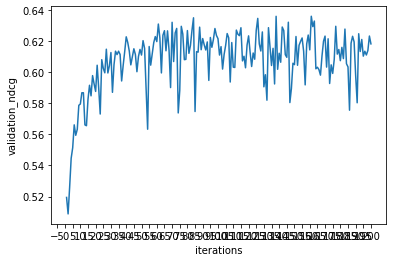

In [ ]:
def train_base_recommendation():
    losses_all=[]
    ndcgs=[]
    if gpu:
        device = torch.device('cuda:%s' % cuda)
    else:
        device = 'cpu'
    # Path(save_path).mkdir(parents=True, exist_ok=True)
    # with open(os.path.join(save_path,dataset + "_dataset_obj.pickle"), 'wb') as outp:
    #     pickle.dump(rec_dataset, outp, pickle.HIGHEST_PROTOCOL)

    train_loader = DataLoader(dataset=UserItemInterDataset(rec_dataset.training_data, 
                                rec_dataset.user_feature_matrix, 
                                rec_dataset.item_feature_matrix),
                          batch_size=64,
                          shuffle=True)
    model = BaseRecModel(768).to(device)
    loss_fn = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

    out_path = os.path.join("./logs", dataset + "_logs")
    Path(out_path).mkdir(parents=True, exist_ok=True)
    
    ndcg = compute_ndcg(rec_dataset.validation_data, 
            rec_dataset.user_feature_matrix, 
            rec_dataset.item_feature_matrix, 
            rec_k, 
            model, 
            device)
    print('init ndcg:', ndcg)
    for epoch in tqdm.trange(epochs):
        model.train()
        optimizer.zero_grad()
        losses = []
        # print(len(train_loader))
        for user_behaviour_feature, item_aspect_feature, label in train_loader:
            user_behaviour_feature = user_behaviour_feature.to(device)
            item_aspect_feature = item_aspect_feature.to(device)
            label = label.float().to(device)
            out = model(user_behaviour_feature, item_aspect_feature).squeeze()
            # print(out)
            if len(out.size())==0:
              continue
            # print(user_behaviour_feature)
            # print( item_aspect_feature)
            loss = loss_fn(out, label)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            losses.append(loss.to('cpu').detach().numpy())
            ave_train = np.mean(np.array(losses))
            losses_all.append(ave_train)
        print('epoch %d: ' % epoch, 'training loss: ', ave_train)
      
        # compute necg
        if epoch % 1 == 0:
            ndcg = compute_ndcg(rec_dataset.validation_data, 
            rec_dataset.user_feature_matrix, 
            rec_dataset.item_feature_matrix, 
            rec_k, 
            model, 
            device)
            print('epoch %d: ' % epoch, 'training loss: ', ave_train, 'NDCG_validation: ', ndcg)

            ndcgs.append(ndcg)
    torch.save(model.state_dict(), os.path.join(save_path2, "modelOnlyTips.model"))
    ndcg_test = compute_ndcg(rec_dataset.test_data, 
            rec_dataset.user_feature_matrix, 
            rec_dataset.item_feature_matrix, 
            rec_k, 
            model, 
            device)
    print('\nndcg_test: ',ndcg_test)
    # plt.xlabel('iterations')
    # plt.ylabel('train_loss')
    # plt.xticks(np.arange(0,len(losses_all),100))
    # plt.plot(np.arange(0,len(losses_all)),losses_all)
    # plt.show()

    plt.xlabel('iterations')
    plt.ylabel('validation_ndcg')
    plt.xticks(np.arange(-5,len(ndcgs)+5,5))
    plt.plot(np.arange(1,len(ndcgs)+1),ndcgs)
    plt.show()
    return rec_dataset


if __name__ == "__main__":
    torch.manual_seed(0)
    np.random.seed(0)
    if gpu:
        os.environ["CUDA_VISIBLE_DEVICES"] =cuda
        print("Using CUDA",cuda)
    else:
        print("Using CPU")
    rec_dataset=train_base_recommendation()

# Save Train and Test Data To File

In [ ]:
training_data=[]
for train_data in rec_dataset.training_data:
  user=train_data[0]
  item=train_data[1]
  label=train_data[2]
  user_id=rec_dataset.inv_user_name_dict[user]
  item_id=rec_dataset.inv_item_name_dict[item]
  training_data.append([user_id,item_id,label])

In [ ]:
np.savetxt('training_data_2.txt', training_data, fmt='%s')
b = np.loadtxt('training_data_2.txt',dtype=str)

In [ ]:
import pickle
pet_stats = {'name':"", 'int':1, 'bool':False}

def pet_save(pet,name):
    with open('{}_data_2.pickle'.format(name), 'wb') as f:
        pickle.dump(pet, f, pickle.HIGHEST_PROTOCOL)

def digimon_load():
    with open('test_data.pickle', 'rb') as f:
        return pickle.load(f)

In [ ]:
testing_data={}
for ts_data in rec_dataset.test_data:
  user=ts_data[0]
  items=ts_data[1]
  labels=ts_data[2]
  # print(user , item, label)
  user_id=rec_dataset.inv_user_name_dict[user]
  items_id=[rec_dataset.inv_item_name_dict[item] for item in items]
  testing_data[user_id]=[items_id,labels]

In [ ]:
pet_save(testing_data,'test')

In [ ]:
validation_data={}
for ts_data in rec_dataset.validation_data:
  user=ts_data[0]
  items=ts_data[1]
  labels=ts_data[2]
  # print(user , item, label)
  user_id=rec_dataset.inv_user_name_dict[user]
  items_id=[rec_dataset.inv_item_name_dict[item] for item in items]
  validation_data[user_id]=[items_id,labels]

In [ ]:
pet_save(validation_data,'validation')

# Generate Explanations

In [ ]:
dataset="yelp"
base_model_path="/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/Recommender/Yelp/"
gpu=True
cuda='0'
data_obj_path="/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/Recommender/Yelp/"
rec_k=5
lam=100
gam=0.7
alp=0.2
user_mask=False
lr=0.01
step=500
mask_thresh=0.3
test_num=5
# save_path="./explanation_objs/"

In [ ]:
import torch
import pickle
import os
from pathlib import Path

# User Perspective Features

In [ ]:
import json
import nltk

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
def lemmatization(text):
    result=''
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
        # if pos in ['n','a']:   
        result+=wordnet.lemmatize(token,pos)+' '
    return result
def remove_stopwords(text):
    en_stopwords = stopwords.words('english')
    en_stopwords+=['may','could','that','without','iii','with','and','This','That','Those','These','the','The','brbr','so','it','such']
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result
def remove_punct(text):
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

def remove_tag(text):
    text=' '.join(text)
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def preprocess(text):
  chars=['&','%','#','@','^','>','<','\n','\\','\t',';','"','/']
  stwords=stopwords.words('english')
  for ch in chars:
    text=text.replace(ch,' ')
  text=" ".join(text.split())
  # text=text.lower()
  text_tokenized=word_tokenize(text)
  cleaned_text= remove_stopwords(text_tokenized)
  cleaned_text= remove_punct(cleaned_text)
  # cleaned_text=lemmatization(cleaned_text)
  cleaned_text=remove_tag(cleaned_text)
  cleaned_text=remove_urls(cleaned_text)
  cleaned_text=''.join([i for i in cleaned_text ])
  cleaned_text=[word for word in cleaned_text.split(' ') if len(word)>1]
  # print(cleaned_text)
  return ' '.join(cleaned_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def preprocess_text_first(text):
  while '<' in text and '>' in text and text.index('<')<text.index('>'):
    toRemove=text[int(text.index('<')):int(text.index('>'))]+'>'
    text=text.replace(toRemove,' ')
  list_to_replace=['mso','gte','xml','false','#',',','!','-','\'','\"','[',']','/','\\n','\\','span','a-size-base','a-color-secondary','input type','header name','value','=','<a href= javascript:void(0) class= ','{','}','class=','header','<a href= javascript:void(0)','<','>','href',')','(',';','quot','&',':','javascript']
  for char in list_to_replace:
    text=text.replace(char,' ')
  for i in range(15):
    text=text.replace('  ',' ')
  # while 'if' in text and 'endif' in text and text.index('if')<text.index('endif'):
  #   # print(int(text.index('if')),int(text.index('endif')))
  #   toRemove=text[int(text.index('if')):int(text.index('endif'))]+'endif'
  #   text=text.replace(toRemove,' ')
  new_text=''
  for word in text.split(' '):
    if len(word)>1 and len(word)<35:
      new_text+=word+' '
  # new_text=lemmatization(new_text)
  # print(new_text)
  return new_text

In [ ]:
items_list1=[]
users_list=[]
review_features={}
f=open(save_path+'Yelp')
lines=f.readlines()
i=0
for line in lines:
  if i%100000==0:
    print(i)
  i+=1
  user_id = line.split('@')[0]
  item_id = line.split('@')[1]
  # if item_id in items_list:
  users_list.append(user_id)
  items_list1.append(item_id)
  l = len(user_id) + len(item_id)
  fosr_data = line[l+3:]
  for seg in fosr_data.split('||'):
    if (user_id,item_id) not in review_features.keys():
      review_features[(user_id,item_id)]=[]
    fos = seg.split(':')[0].strip('|')
    if len(fos.split('|')) > 1:
          feature = fos.split('|')[0]
          opinion = fos.split('|')[1]
          sentiment = fos.split('|')[2]
          sentence= seg.split(':')[1]
          if sentiment=='+1':
            senti=1
          else:
            senti=-1
          review_features[(user_id,item_id)].append([feature,opinion,senti,sentence])
    else:
      print(user_id,item_id)

0
100000
200000
300000
400000
500000
1Xw_npZXLcsWBvlLYCiW_A fKrmWy4GFsrgdOYhN9pyZA
600000
700000
800000
900000
1000000
1100000
1200000
1300000


In [ ]:
print(list(review_features.keys())[0])

('mh_-eMZ6K5RLWhZyISBhwA', 'XQfwVwDr-v0ZS3_CbbE5Xw')


In [ ]:
print(len(review_features))

1130440


In [ ]:
tip_df

,user_id,business_id,text,date,compliment_count,bus_user_id
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0,"(QoezRbYQncpRqyrLH6Iqjg, NBN4MgHP9D3cw--SnauTkA)"
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0,"(hV-bABTK-glh5wj31ps_Jw, FjMQVZjSqY8syIO-53KFKw)"
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0,"(_uN0OudeJ3Zl_tf6nxg5ww, ld0AperBXk1h6UbqmM80zw)"
8,VL12EhEdT4OWqGq0nIqkzw,xODBZmX4EmlVvbqtKN7YKg,Tacos,2012-07-27 01:48:24,0,"(xODBZmX4EmlVvbqtKN7YKg, VL12EhEdT4OWqGq0nIqkzw)"
10,OttfcRxgRrYsTg9EV5Aozg,clwjLY7PdYJpe7IP9lrqEw,Order the Tortilla Soup,2014-06-17 01:20:14,0,"(clwjLY7PdYJpe7IP9lrqEw, OttfcRxgRrYsTg9EV5Aozg)"
...,...,...,...,...,...,...
908909,FowxkbAixI3hlREeCgIa_Q,kfNv-JZpuN6TVNSO6hHdkw,Great experience with a phenomenal food with a...,2021-05-09 23:21:10,0,"(kfNv-JZpuN6TVNSO6hHdkw, FowxkbAixI3hlREeCgIa_Q)"
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0,"(OaGf0Dp56ARhQwIDT90w_g, 1uxtQAuJ2T5Xwa_wp7kUnA)"
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0,"(hYnMeAO77RGyTtIzUSKYzQ, v48Spe6WEpqehsF2xQADpg)"
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0,"(s2eyoTuJrcP7I_XyjdhUHQ, ckqKGM2hl7I9Chp5IpAhkw)"


In [ ]:
len(list(set(tip_df['bus_user_id'].values)))

541276

In [ ]:
pairs_texts=tip_df[['bus_user_id','text']].apply(tuple, axis=1)

In [ ]:
pairs_texts.values[0]

(('QoezRbYQncpRqyrLH6Iqjg', 'NBN4MgHP9D3cw--SnauTkA'),
 'They have lots of good deserts and tasty cuban sandwiches')

In [ ]:
user_test_perspective={}
i=0
for (user_id , item_id) in review_features.keys():
  review_feature=review_features[(user_id,item_id)]
  if i%50000==0:
    print(i)
  i+=1
  for features in review_feature:
    sentence=features[3]
    sentence=preprocess_text_first(sentence)
    sentence=preprocess(sentence).lower()
    final_vect=[]
    if (user_id , item_id) not in user_test_perspective.keys():
      new_final_vect=[]
    else:
      new_final_vect=user_test_perspective[(user_id , item_id)]
    final_vect+=sentence.split(' ')
    for word in sentence.split(' '):
      # tokens=list(set(df_words[df_words['word']==word]['tokenized'].values))
      # for token in tokens:
        final_vect+=word.split(' ')
    final_vect=list(set(final_vect))
    for word in final_vect:
      if len(word)>1:
        new_final_vect.append(word)
    user_test_perspective[(user_id , item_id)]=list(set(new_final_vect))

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000
1100000


In [ ]:
# user_test_perspective={}
# i=0
# for row in pairs_texts.values:
#   # review_feature=review_features[(user_id,item_id)]
#   (item_id,user_id)=row[0]
#   sentence=row[1]
#   # print(tip_feature)
#   if i%20000==0:
#     print(i)
#   i+=1
#   # for sentence in tip_feature:
#   sentence=preprocess_text_first(sentence)
#   sentence=preprocess(sentence).lower()
#   final_vect=[]
#   if (user_id , item_id) not in user_test_perspective.keys():
#     new_final_vect=[]
#   else:
#     new_final_vect=user_test_perspective[(user_id , item_id)]

#   final_vect=sentence.split(' ')
#   for word in sentence.split(' '):
#     # tokens=list(set(df_words[df_words['word']==word]['tokenized'].values))
#     # for token in tokens:
#       final_vect+=word.split(' ')
#   final_vect=list(set(final_vect))
#   for word in final_vect:
#     if len(word)>1:
#       new_final_vect.append(word)
#   user_test_perspective[(user_id , item_id)]=list(set(new_final_vect))

0
20000
40000
60000
80000
100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
380000
400000
420000
440000
460000
480000
500000
520000
540000
560000
580000
600000
620000


In [ ]:
list(user_test_perspective.keys())[0]

('NBN4MgHP9D3cw--SnauTkA', 'QoezRbYQncpRqyrLH6Iqjg')

In [ ]:
class ExpOptimizationModel(torch.nn.Module):
    def __init__(self, base_model, rec_dataset, device):
        super(ExpOptimizationModel, self).__init__()
        self.base_model = base_model
        self.rec_dataset = rec_dataset
        self.device = device
        self.u_i_exp_dict = {}  # {(user, item): [f1, f2, f3 ...], ...}
        self.user_feature_matrix = torch.from_numpy(self.rec_dataset.user_feature_matrix).to(self.device)
        self.item_feature_matrix = torch.from_numpy(self.rec_dataset.item_feature_matrix).to(self.device)
        self.rec_dict, self.user_perspective_test_data = self.generate_rec_dict()
        self.dict_items_cf_feature={}

    def generate_rec_dict(self):
        rec_dict = {}
        correct_rec_dict = {}  # used for user-side evaluation
        for row in self.rec_dataset.test_data:
            user = row[0]
            items = row[1]
            labels = row[2]
            correct_rec_dict[user] = []
            user_features = self.user_feature_matrix[user].repeat(len(items), 1)
            scores = self.base_model(user_features,
                        self.item_feature_matrix[items]).squeeze()
            scores = np.array(scores.to('cpu'))
            sort_index = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)
            sorted_items = [items[i] for i in sort_index]
            rec_dict[user] = sorted_items
            for i in range(rec_k):  # find the correct items and add to the user side test data
                if labels[sort_index[i]] == 1:
                    correct_rec_dict[user].append(items[sort_index[i]])

        user_perspective_test_data = {}  # {(u, i):f, (u, i): f]}
        # for user, items in correct_rec_dict.items():
        #     for item in items:
        #         user_id=rec_dataset.inv_user_name_dict[user]
        #         item_id=rec_dataset.inv_item_name_dict[item]
        #         if (user_id, item_id) in user_test_perspective.keys():
        #           feature = user_test_perspective[(user_id, item_id)]
        #           user_perspective_test_data[(user, item)] = feature
        return rec_dict, user_perspective_test_data
    def user_side_evaluation(self):
        ave_pre, ave_rec, ave_f1 = evaluate_user_perspective(self.user_perspective_test_data, self.u_i_exp_dict)
        print('user\'s perspective:')
        print('ave pre: ', ave_pre, '  ave rec: ', ave_rec, '  ave f1: ', ave_f1)
    
    def model_side_evaluation(self):
        ave_pn, ave_ps, ave_fns = evaluate_model_perspective(
            self.rec_dict,
            self.u_i_exp_dict,
            self.base_model,
            self.rec_dataset.user_feature_matrix,
            self.rec_dataset.item_feature_matrix,
            rec_k,
            self.dict_items_cf_feature,
            self.device)
        print('model\'s perspective:')
        print('ave PN: ', ave_pn, '  ave PS: ', ave_ps, '  ave F_{NS}: ', ave_fns)  
    def generate_explanation(self):
        # u_i_exps_dict = {}  # {(user, item): [f1, f2, f3 ...], ...}
        exp_nums = []
        exp_complexities = []
        self.no_exp_count = 0
        self.exp_count=0
        if test_num == -1:
            test_num1 = len(list(self.rec_dict.items()))
        else:
            test_num1 = test_num
        count=0
        for user, items in tqdm.tqdm(list(self.rec_dict.items())[:10]):
            count+=1
            # if count<200:
            #   continue
            # if count==2:
            #   break
            items = self.rec_dict[user]
            margin_item = items[rec_k]
            margin_score = self.base_model(self.user_feature_matrix[user].unsqueeze(0), 
                            self.item_feature_matrix[margin_item].unsqueeze(0)).squeeze()
            # print(margin_score)
            # if user_mask:
            #     # mask_vec = self.generate_mask(user)
            #     mask_vec = torch.where(self.user_feature_matrix[user]>0, 1., 0.).unsqueeze(0)  # only choose exps from the user cared aspects
            # else:
                
            for item in items[: rec_k]:
                item_id=rec_dataset.inv_item_name_dict[item]
                tensor_vect=get_tensor_vects(item_id)
                self.dict_items_cf_feature[item]=(tensor_vect)
                # print(tensor_vect_desc.shape)
                # print(tensor_vect_title.shape)
                # print(tensor_vect_feature.shape)
                explanation_features,explanation_features_words, exp_num, exp_complexity = self.explain(user,item,
                    self.user_feature_matrix[user], 
                    self.item_feature_matrix[item], 
                    margin_score,
                    tensor_vect)
                
                if explanation_features is None:
                    # print('no explanation for user %d and item %d' % (user, item))
                    self.no_exp_count += 1
                else:
                    self.exp_count+=1
                    self.u_i_exp_dict[(user, item)] = explanation_features_words
                    # print(explanation_features_words)
                    exp_nums.append(exp_num)
                    exp_complexities.append(exp_complexity)
            # if count%500==0:
            #   json1 = json.dumps(self.u_i_exp_dict)
            #   f = open("drive/MyDrive/ranjbar/dict{}.json".format(count),"w")
            #   f.write(json1)
            #   f.close()

              
        print('ave num: ', np.mean(exp_nums), 'ave complexity: ', np.mean(exp_complexities) , 'no_exp_count: ', self.no_exp_count, 'exp_count: ', self.exp_count)
        return True
    
    def explain(self,user,item, user_feature, item_feature, margin_score,tensor_vect):
        exp_generator = EXPGenerator(
            self.rec_dataset, 
            self.base_model, 
            user_feature, 
            item_feature, 
            user,
            item,
            margin_score,
            tensor_vect, 
            self.device).to(self.device)

        # optimization
        optimizer = torch.optim.SGD(exp_generator.parameters(), lr=lr, weight_decay=0)
        exp_generator.train()
        lowest_loss = None
        lowest_bpr = None
        lowest_l2 = 0
        optimize_delta = None
        score = exp_generator()
        # print(score)
        bpr, l2, l1, loss = exp_generator.loss(score)
        # print('init: ', 0, '  train loss: ', loss, '  bpr: ', bpr, '  l2: ', l2, '  l1: ', l1)
        lowest_loss = loss
        lowest_bpr=bpr
        optimize_delta = exp_generator.delta.detach().to('cpu').numpy()
        optimize_weights=exp_generator.weights.detach().to('cpu').numpy()
        lowest_l2 = l2
        for epoch in range(step):
            exp_generator.zero_grad()
            score = exp_generator()
            bpr, l2, l1, loss = exp_generator.loss(score)

            # if epoch %100 == 0:
            #     print(
            #         'epoch', epoch,
            #         'bpr: ', bpr,
            #         'l2: ', l2,
            #         'l1', l1,
            #         'loss', loss)

            loss.backward()
            optimizer.step()
            if loss < lowest_loss:
                lowest_loss = loss
                lowest_l2 = l2
                lowest_bpr = bpr
                optimize_delta = exp_generator.delta.detach().to('cpu').numpy()
                optimize_weights=exp_generator.weights.detach().to('cpu').numpy()
        # print(lowest_bpr)
        # print(lam * alp)
        # print(optimize_delta)
        if lowest_bpr >= lam * alp:
            explanation_features = None 
            exp_num = None
            exp_complexity = None
            explanation_features_words=None
        else:
            # optimize_delta = exp_generator.delta.detach().to('cpu').numpy()
            # print(optimize_delta)
            # explanation_features = np.argwhere(optimize_delta < - mask_thresh).squeeze(axis=1)
            explanation_features = np.argwhere(optimize_weights <  mask_thresh).squeeze(axis=1)
            # print(optimize_weights)
            # print(explanation_features)
            
            # print(explanation_features)
            if len(explanation_features) == 0:
                explanation_features = np.array([np.argmin(optimize_weights)])
            # print(explanation_features)
            # print(exp_generator.features)
            explanation_features_words=list(set([exp_generator.features[i] for i in explanation_features]))
            # print(explanation_features_words)
            # print('-------------\n')
            new_vect=[]
            for word in explanation_features_words:
              new_vect+=(str(word).split(' '))
            new_vect=list(set(new_vect))
            new_vect=[word for word in new_vect if len(word)>1]
            explanation_features_words=new_vect
            exp_num = len(explanation_features_words)
            exp_complexity = lowest_l2.to('cpu').detach().numpy() + gam * exp_num
        return explanation_features,explanation_features_words, exp_num, exp_complexity

In [ ]:
def get_new_item_vector(item,item_feature_name,new_weights,tensor_vect):
    # item_id= rec_dataset.inv_item_name_dict[item]
    final_vector=[]
    # print(len(new_weights))
    # print(len(item_feature_name[0]))
    # print(tensor_vect_desc.shape)
    average_vect=get_average_vect_test(new_weights,tensor_vect)
    # rank=normalized_rank[item_id]*new_weights[-1]
    # final_vector=torch.cat((average_vect_desc,average_vect_title,average_vect_feature))
    # print(len(final_vector))
    # final_vect=np.array(final_vector, dtype='float32')
    return average_vect

In [ ]:
class EXPGenerator(torch.nn.Module):
    def __init__(self, rec_dataset, base_model, user_vect, item_vect,user,item, margin_score,tensor_vect, device):
        super(EXPGenerator, self).__init__()
        self.rec_dataset = rec_dataset
        self.base_model = base_model
        self.user_vect = user_vect
        self.item_vect= item_vect
        self.margin_score = margin_score
        self.device = device
        self.features=rec_dataset.tips_features[item][0]
        self.feature_length=len(self.features)
        self.tensor_vect=tensor_vect
        # print(self.features)
        self.item=item
        self.user=user
  
        # self.feature_range = [0, 1]  # hard coded, should be improved later
        self.delta_range = 1  # the maximum feature value.
        self.delta = torch.nn.Parameter(
            torch.FloatTensor(self.feature_length).uniform_(-self.delta_range, 0))
        self.ws=torch.ones(self.feature_length).to(device)
        # print(self.features)
        # print(self.ws)
    
    def get_masked_item_feature(self):
        item_feature_name=self.rec_dataset.tips_features[self.item]
        # print(item_feature_name)
        self.weights=(self.ws+ torch.clamp((self.delta), -self.delta_range,0))
        # new_weights= 1.0/(1.0+torch.exp(-3.0*new_weights))
        # new_weights= torch.where(new_weights>=0.5 , 1.0 , 0.0)
        # new_weights=torch.tensor(new_weights , dtype= torch.float)
        # print(len(self.weights))
        item_feature_star=get_new_item_vector(self.item,item_feature_name,self.weights,self.tensor_vect)
        # print(item_feature_star)
        return item_feature_star
    
    def forward(self):
        item_feature_star = self.get_masked_item_feature()
        # print(item_feature_star.unsqueeze(0).shape)
        # print(self.user_vect.unsqueeze(0).shape)
        score = self.base_model(self.user_vect.unsqueeze(0), item_feature_star.unsqueeze(0))
        # print(score)
        return score
    
    def loss(self, score):
        # print(score - self.margin_score)
        bpr = torch.nn.functional.relu(alp + score - self.margin_score) * lam
        # print(score - self.margin_score)
        l2 = torch.linalg.norm(self.delta)
        # num_removed= 1.0/(1.0+torch.exp(-1.0*self.delta))
        # num_removed=torch.tensor(num_removed , dtype= torch.float)
        # print(num_removed)
        l1 = torch.linalg.norm(self.delta, ord=1) * gam
        loss =  bpr +l1
        return bpr, l2, l1, loss

In [ ]:
def evaluate_user_perspective(user_perspective_data, u_i_expl_dict):
    pres = []
    recs = []
    f1s = []
    # print(u_i_expl_dict)
    for u_i, gt_features in user_perspective_data.items():
        # print(gt_features)
        # print(u_i)
        # print(u_i_expl_dict.keys())
        # print(u_i_expl_dict)
        if u_i in u_i_expl_dict:
            pre_features = u_i_expl_dict[u_i]
            # print(pre_features)
            if len(pre_features)>0:
              TP = 0
              # print('f: ', gt_features, pre_features)
              for feature in pre_features:
                  if feature in gt_features:
                      TP += 1
              # print(gt_features)
              # print(pre_features)
              pre = TP / len(pre_features)
              rec = TP / len(gt_features)
              if (pre + rec) != 0:
                  f1 = (2 * pre * rec) / (pre + rec)
              else:
                  f1 = 0
              pres.append(pre)
              recs.append(rec)
              # if f1 !=0:
              f1s.append(f1)
    ave_pre = np.mean(pres)
    ave_rec = np.mean(recs)
    ave_f1 = np.mean(f1s)
    # ave_f1 = (2 *  ave_pre * rec) / (pre + rec)
    return ave_pre, ave_rec, ave_f1

In [ ]:
def get_tensor_vect_df(df,not_in_columns):
  df1=df.copy()
  df1['main_word']=np.where(df1['replaced_word'] == df1[not_in_columns],1,0)
  df1=df1[df1['main_word']==1]
  if df1.empty:
    df1=df.copy()
    df1['main_word']=np.where(df1['logit']==5.0,1,0)
    df1=df1[df1['main_word']==1]
  if df1.empty:
    df1=df.copy()
    df1['main_word']=np.where(df1['logit']==12.0,1,0)
    df1=df1[df1['main_word']==1]
  lists=df1.loc[:, ~df1.columns.isin([not_in_columns,'replaced_word','logit','main_word'])].values
  words=df1[not_in_columns].values
  # print(words)
  vects=[sub_list[0] for sub_list in lists]
  tensor_vect=torch.FloatTensor(vects).to(device)
  return tensor_vect

In [ ]:
def get_tensor_vects(item_id):
  tensor_vect_desc=None
  # print(item_id)
  # if os.path.exists(save_path+'descriptions_bert/'+'df_bert_desc_{}.json'.format(item_id)) :
  df_vect_tip= pd.read_json(save_path+'tips_bert_items_dfs/'+'{}.json'.format(item_id))
  # df_vect_desc=df_vect[0]
  tensor_vect_tip=get_tensor_vect_df(df_vect_tip,'word')
  return tensor_vect_tip

In [ ]:
def get_average_vect_test(weights,tensor_vect):
  # weights=torch.FloatTensor(weights).to(device)
  weights=torch.transpose(weights.repeat(tensor_vect.shape[1],1),0,1)
  # print(weights)
  # print(tensor_vect.shape)
  average=torch.mean(weights*tensor_vect,axis=0).to(device)
  return average

In [ ]:
def get_new_item_vector2(item,new_weights,tensor_vect_tip):
    # item_id= rec_dataset.inv_item_name_dict[item]
    final_vector=[]
    average_vect_tips=get_average_vect_test(new_weights,tensor_vect_tip)
    final_vector=average_vect_tips
    return final_vector

In [ ]:
list(scaled_features.columns).index('latitude')

1

In [ ]:
def sample_gumbel(shape, eps=1e-20):
      U = torch.rand(shape)
      U = U.cuda()
      return -torch.log(-torch.log(U + eps) + eps)
def evaluate_model_perspective(
        rec_dict,
        u_i_exp_dict,
        base_model,
        user_feature_matrix,
        item_feature_matrix,
        rec_k,
        dict_items_cf_feature,
        device):
    """
    compute PN, PS and F_NS score for the explanations
    :param rec_dict: {u1: [i1, i2, i3, ...] , u2: [i1, i2, i3, ...]}
    :param u_i_exp_dict: {(u, i): [f1, f2, ...], ...}
    :param base_model: the trained base recommendation model
    :param user_feature_matrix: |u| x |p| matrix, the attention on each feature p for each user u
    :param item_feature_matrix: |i| x |p| matrix, the quality on each feature p for each item i
    :param rec_k: the length of the recommendation list, only generated explanations for the items on the list
    :param device: the device of the model
    :return: the mean of the PN, PS and FNS scores
    """
    pn_count = 0
    ps_count = 0
    # df_vects=rec_dataset.df_vects
    # print(len( u_i_exp_dict))
    i=0
    count_all=0
    dict_items={}
    for u_i, fs in u_i_exp_dict.items():
        # if i%100==0:
        #   print(i)
        # i+=1
        # if i>15600 and i<16000: 
        #   continue
        user = u_i[0]
        target_item = u_i[1]
        features = fs
        items = rec_dict[user]
        target_index = items.index(target_item)
        
        # new_features_not_scaled=features[1]
        features_words=list(set(features))
        # print(features_words)
        # if len(features_words)>0 or len(new_features_not_scaled)>2:
        count_all+=1
        # other_features=list(features[0][0].columns)
        # print(other_features)
        # print(len(items))

        # compute PN
        cf_items_features1 = []
        cf_items_features2 = []
        for item in items:
            item_id=rec_dataset.inv_item_name_dict[item]
            item_feature_words=rec_dataset.tips_features[item][0]
            weights1=[0.0 if fea in features_words else 1.0 for fea in  item_feature_words]
            weights2=[1.0 if fea in features_words else 0.0 for fea in  item_feature_words]
            weights1=torch.from_numpy(np.array(weights1,dtype='float32')).to(device)
            weights2=torch.from_numpy(np.array(weights2,dtype='float32')).to(device)
            # print(len(all_features))
            # print(all_features)
            # weights=torch.FloatTensor(weights).to(device)
            if item in dict_items_cf_feature.keys():
              tensor_vect_tip=dict_items_cf_feature[item]
            else:
              tensor_vect_tip=get_tensor_vects(item_id)
              dict_items_cf_feature[item]=tensor_vect_tip
            
            item_cf_feature1=get_new_item_vector2(item,weights1,tensor_vect_tip).detach().to('cpu').numpy()
            item_cf_feature2=get_new_item_vector2(item,weights2,tensor_vect_tip).detach().to('cpu').numpy()
            cf_items_features1.append(item_cf_feature1)
            cf_items_features2.append(item_cf_feature2)

        cf_ranking_scores1 = base_model(torch.from_numpy(np.array([user_feature_matrix[user]
                                                                      for i in range(len(cf_items_features1))])
                                                            ).to(device),
                                          torch.from_numpy(np.array(cf_items_features1,dtype='float32')).to(device)).squeeze()
        cf_score_list1 = cf_ranking_scores1.to('cpu').detach().numpy()
        # print(np.sort( cf_score_list1)[::-1])
        sorted_index1 = np.argsort(cf_score_list1)[::-1]
        # print(sorted_index1)
        cf_rank1 = np.argwhere(sorted_index1 == target_index)[0, 0]  # the updated ranking of the current item
        # print(cf_rank1)
        if cf_rank1 > rec_k - 1:
            pn_count += 1
        # compute NS
        cf_ranking_scores2 = base_model(torch.from_numpy(np.array([user_feature_matrix[user]
                                                                      for i in range(len(cf_items_features2))])
                                                            ).to(device),
                                          torch.from_numpy(np.array(cf_items_features2,dtype='float32')).to(device)).squeeze()
        cf_score_list2 = cf_ranking_scores2.to('cpu').detach().numpy()
        sorted_index2 = np.argsort(cf_score_list2)[::-1]
        cf_rank2 = np.argwhere(sorted_index2 == target_index)[0, 0]  # the updated ranking of the current item
        if cf_rank2 < rec_k:
            ps_count += 1
    if len(u_i_exp_dict) != 0:
        pn = pn_count / count_all
        ps = ps_count / count_all
        if (pn + ps) != 0:
            fns = (2 * pn * ps) / (pn + ps)
        else:
            fns = 0
    else:
        pn = 0
        ps = 0
        fns = 0
    return pn, ps, fns

In [ ]:
def generate_explanation():
    if gpu:
        device = torch.device('cuda:%s' %cuda)
    else:
        device = 'cpu'
    print(device)
    # import dataset
    
    base_model = BaseRecModel(768).to(device)
    base_model.load_state_dict(torch.load(os.path.join(save_path2,"modelOnlyTips.model"),map_location=torch.device(device)))
    base_model.eval()
    #  fix the rec model
    for param in base_model.parameters():
        param.requires_grad = False
    
    # Create optimization model
   
    # lrs=[0.2,0.3,0.4,0.5,0.6,0.7]
    # temps=[1.0,1.2,1.4,1.5,1.6,2.0]
    a=100.0
    # bs=[1.0,2.0,5.0]
    # cs=[1000.0]
    lrs=[0.5]
    bs=[2.0]
    cs=[10.0]
    opt_model = ExpOptimizationModel(base_model=base_model,rec_dataset=rec_dataset,device = device)
    opt_model.generate_explanation()
    # opt_model.user_side_evaluation()
    opt_model.model_side_evaluation()
    # Path(save_path).mkdir(parents=True, exist_ok=True)
    # with open(os.path.join(save_path, dataset + "_explanation_obj.pickle"), 'wb') as outp:
    #     pickle.dump(opt_model, outp, pickle.HIGHEST_PROTOCOL)
    
    # with open(os.path.join(save_path, dataset + "_explanation_obj.pickle"), 'rb') as opt:
    #     opt_model = pickle.load(opt)
            
    # print(opt_model.u_i_exp_dict)
    # Path(save_path).mkdir(parents=True, exist_ok=True)
    # with open(os.path.join(save_path, dataset + "_explanation_obj.pickle"), 'wb') as outp:
    #     pickle.dump(opt_model, outp, pickle.HIGHEST_PROTOCOL)
    return opt_model


if __name__ == "__main__":
    opt_model=generate_explanation()

cuda:0


100%|██████████| 20/20 [03:25<00:00, 10.25s/it]


ave num:  14.144329896907216 ave complexity:  13.869155655755211 no_exp_count:  3 exp_count:  97
model's perspective:
ave PN:  0.845360824742268   ave PS:  0.9072164948453608   ave F_{NS}:  0.8751970891449363


In [ ]:
rec_dataset.inv_item_name_dict[29792]

'WkcmS4_R6iCUdxuNEEcM-Q'

In [ ]:
rec_dataset.inv_user_name_dict[3468]

'EuopqHg-cCgb0MjbIRCWJQ'

In [ ]:
scaled_features[scaled_features['business_id']=='cXSyVvOr9YRN9diDkaWs0Q']

,business_id,latitude,longitude,extensions,tesday,karaoke,crly,BusinessParking,GoodForKids,soy-free,...,Sunday-14,Sunday-15,Sunday-16,Sunday-17,Sunday-18,Sunday-19,Sunday-20,Sunday-21,Sunday-22,Sunday-23
5073,cXSyVvOr9YRN9diDkaWs0Q,0.617278,0.962269,-0.016158,0.199551,0.265498,-0.038524,0.0,1.081264,0.01214,...,0.682789,-1.406415,-1.366261,-1.203323,-1.045674,-0.964793,-0.837287,-0.638478,-0.45292,-0.386191


In [ ]:
rec_dataset.item_name_dict['cXSyVvOr9YRN9diDkaWs0Q']

87

In [ ]:
scaled_features['extensions'].max()

10.813683527586809

In [ ]:
list(set(scaled_features.iloc[:,90].values))

[54.923122700510184, -54.91502985278389, 0.004046423863150696]

In [ ]:
len(user_test_perspective.keys())

1130440

# calculate Stability...

In [ ]:
def generate_explanation_check_stability():
    if gpu:
        device = torch.device('cuda:%s' %cuda)
    else:
        device = 'cpu'
    print(device)
    # import dataset
    # with open(os.path.join(data_obj_path, dataset + "_dataset_obj_4.pickle"), 'rb') as inp:
    #     rec_dataset = pickle.load(inp)
    
    base_model = BaseRecModel(768).to(device)
    base_model.load_state_dict(torch.load(os.path.join(save_path2,"modelOnlyTips.model"),map_location=torch.device(device)))
    base_model.eval()
    #  fix the rec model
    for param in base_model.parameters():
        param.requires_grad = False
    
    
    # Create optimization model
    a=100.0
    # bs=[1.0,2.0]
    # cs=[1000.0,2000.0,10000.0]
    lr=0.5
    temp=1.4
    b=2.0
    c=10.0
    features_found=[]
    for i in range(10):
      opt_model = ExpOptimizationModel(
        base_model=base_model,
        rec_dataset=rec_dataset,
        device = device,)
      opt_model.generate_explanation()
      features_found.append(opt_model.u_i_exp_dict)
      
    
    return features_found


if __name__ == "__main__":
    features_found=generate_explanation_check_stability()

cuda:0


100%|██████████| 10/10 [01:12<00:00,  7.21s/it]


ave num:  15.2 ave complexity:  14.832112574577332 no_exp_count:  0 exp_count:  50


100%|██████████| 10/10 [00:40<00:00,  4.06s/it]


ave num:  14.88 ave complexity:  14.547938550472258 no_exp_count:  0 exp_count:  50


100%|██████████| 10/10 [00:39<00:00,  3.98s/it]


ave num:  14.64 ave complexity:  14.365325158119202 no_exp_count:  0 exp_count:  50


100%|██████████| 10/10 [00:39<00:00,  3.92s/it]


ave num:  15.04 ave complexity:  14.6501302819252 no_exp_count:  0 exp_count:  50


100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


ave num:  15.42 ave complexity:  14.974829159617423 no_exp_count:  0 exp_count:  50


100%|██████████| 10/10 [00:37<00:00,  3.79s/it]


ave num:  14.94 ave complexity:  14.605522543668746 no_exp_count:  0 exp_count:  50


100%|██████████| 10/10 [00:39<00:00,  3.93s/it]


ave num:  14.88 ave complexity:  14.549065817356114 no_exp_count:  0 exp_count:  50


100%|██████████| 10/10 [00:37<00:00,  3.79s/it]


ave num:  15.16 ave complexity:  14.749732838392255 no_exp_count:  0 exp_count:  50


100%|██████████| 10/10 [00:38<00:00,  3.85s/it]


ave num:  14.92 ave complexity:  14.563291264414788 no_exp_count:  0 exp_count:  50


100%|██████████| 10/10 [00:37<00:00,  3.79s/it]

ave num:  14.78 ave complexity:  14.460956114888187 no_exp_count:  0 exp_count:  50


In [ ]:
dict_features={}
for iter_feas in features_found:
  for u_i in iter_feas.keys():
    # feas=list(iter_feas[u_i][0][0].columns)
    feas=iter_feas[u_i]
    # print(iter_feas[u_i][0][0])
    if u_i in dict_features.keys():
      dict_features[u_i].append(feas)
    else:
      dict_features[u_i]=[]
      dict_features[u_i].append(feas)

In [ ]:
dict_features

{(1717, 3027): [['store', 'cashier', 'gave', 'drive', 'nicest'],
  ['back', 'store', 'items', 'cashier', 'gave', 'nicest'],
  ['throw', 'items', 'accident', 'cash', 'cashier', 'right', 'gave', 'nicest'],
  ['sure', 'store', 'knowingly', 'items', 'receipt', 'right', 'drive'],
  ['need',
   'sure',
   'back',
   'store',
   'knowingly',
   'accident',
   'items',
   'away',
   'drive'],
  ['store', 'nicest', 'items', 'back'],
  ['teen', 'store', 'items', 'bin', 'printers', 'day', 'donate', 'integrity'],
  ['need',
   'store',
   'items',
   'receipt',
   'right',
   'selection',
   'donate',
   'integrity'],
  ['need', 'store', 'items', 'bin', 'drive', 'donate', 'integrity'],
  ['knowingly', 'items', 'accident', 'cash', 'right', 'gave', 'nicest']],
 (1717,
  3766): [['caution',
   'shop',
   'mart',
   'lot',
   'good',
   'everything',
   'really',
   'nearly',
   'star',
   'want',
   'wally',
   'right',
   'inside',
   'use',
   'waste',
   'walmart',
   'damn',
   'target',
   'busy

In [ ]:
stability=0
# count_all=0
for ui in dict_features.keys():
  features=dict_features[ui]
  stabs=0
  count=0
  if(len(features)>1):
    # count_all+=1
    for i in range(len(features)):
      for j in range(len(features)):
        # print(features[i])
        # print(features[j])
        if len(features[i])>0 and len(features[j])>0:
          if i != j:
            intersection = list(set(features[i]) & set(features[j]))
            union = list(set(features[i]) | set(features[j]))
            # print(features[i],features[j])
            # print(intersection)
            # print(union)
            count+=1
            stabs+=(len(intersection)/len(union))
    # print(stabs)
    # print(len(features)*(len(features)-1))
    # print((stabs/(len(features)*(len(features)-1))))
    stability+=(stabs/(9.0*10.0))

stability=stability/len(dict_features)
print(stability)

0.5840937483586582
